In [1]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install tensorflow

In [5]:
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix


from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape, SimpleRNN, Conv2D, MaxPooling2D, LSTM
from tensorflow.keras.utils import to_categorical

from tabulate import tabulate


In [7]:


# Load the dataset
file_path = 'H1N1_Flu_Vaccines - Clean.csv'
data = pd.read_csv(file_path)

# Show the head of the dataframe
data_head = data.head()

# Display the head of the dataframe
data_head

,id,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,...,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
0,1,0,1,0,0,0,0,0,0,1,...,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0,0,0,0
1,2,1,3,2,0,1,0,1,0,1,...,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0,0,0,1
2,3,2,1,1,0,1,0,0,0,0,...,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2,0,0,0
3,4,3,1,1,0,1,0,1,1,0,...,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0,0,0,1
4,5,4,2,1,0,1,0,1,1,0,...,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1,0,0,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           26707 non-null  int64 
 1   respondent_id                26707 non-null  int64 
 2   h1n1_concern                 26707 non-null  int64 
 3   h1n1_knowledge               26707 non-null  int64 
 4   behavioral_antiviral_meds    26707 non-null  int64 
 5   behavioral_avoidance         26707 non-null  int64 
 6   behavioral_face_mask         26707 non-null  int64 
 7   behavioral_wash_hands        26707 non-null  int64 
 8   behavioral_large_gatherings  26707 non-null  int64 
 9   behavioral_outside_home      26707 non-null  int64 
 10  behavioral_touch_face        26707 non-null  int64 
 11  doctor_recc_h1n1             26707 non-null  int64 
 12  doctor_recc_seasonal         26707 non-null  int64 
 13  chronic_med_condition        26

In [9]:
data.describe()

,id,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,...,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000
mean,13354.000000,13353.000000,1.612910,1.257049,0.048714,0.719961,0.068933,0.824316,0.357472,0.336279,...,3.808889,2.323061,2.337589,3.973640,2.686075,2.095630,0.878234,0.529599,0.212454,0.465608
std,7709.791156,7709.791156,0.913676,0.622368,0.215273,0.449026,0.253345,0.380558,0.479264,0.472444,...,1.057023,1.286238,1.362543,1.147111,1.391849,1.328782,0.754725,0.925264,0.409052,0.498825
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6677.500000,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,13354.000000,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,20030.500000,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,5.000000,4.000000,4.000000,5.000000,4.000000,2.000000,1.000000,1.000000,0.000000,1.000000
max,26707.000000,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


In [10]:
data.isnull().sum()

id                             0
respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment

In [11]:
data.shape

(26707, 36)

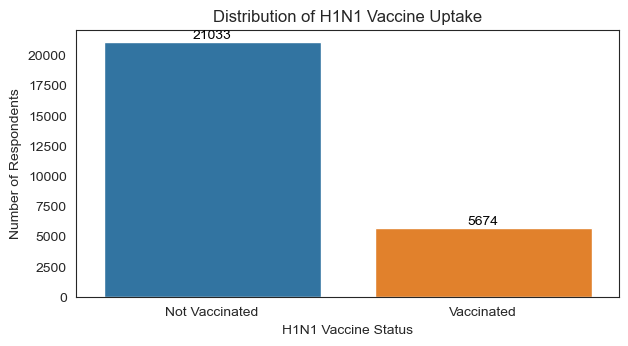

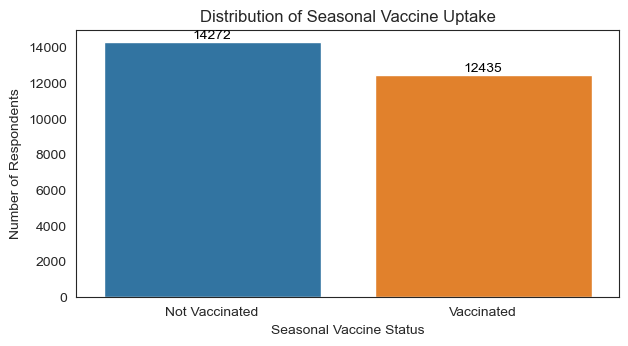

In [12]:
# Set the aesthetic style of the plots
sns.set_style('white')

# Plot the distribution of H1N1 vaccine uptake
plt.figure(figsize=(7, 3))  # Adjusted figsize
h1n1_vaccine_dist = sns.countplot(x='h1n1_vaccine', data=data)

# Add data labels without decimal points
for p in h1n1_vaccine_dist.patches:
    h1n1_vaccine_dist.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                                textcoords='offset points')

plt.title('Distribution of H1N1 Vaccine Uptake')
plt.xlabel('H1N1 Vaccine Status')
plt.ylabel('Number of Respondents')
plt.xticks([0, 1], ['Not Vaccinated', 'Vaccinated'])
plt.subplots_adjust(top=1)
plt.show()

# Plot the distribution of Seasonal vaccine uptake
plt.figure(figsize=(7, 3))  # Adjusted figsize
seasonal_vaccine_dist = sns.countplot(x='seasonal_vaccine', data=data)

# Add data labels without decimal points
for p in seasonal_vaccine_dist.patches:
    seasonal_vaccine_dist.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                                   ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                                   textcoords='offset points')

plt.title('Distribution of Seasonal Vaccine Uptake')
plt.xlabel('Seasonal Vaccine Status')
plt.ylabel('Number of Respondents')
plt.xticks([0, 1], ['Not Vaccinated', 'Vaccinated'])
plt.subplots_adjust(top=1)
plt.show()



> -  The first chart shows the number of respondents who have been vaccinated for H1N1.
> - The second chart displays the number of respondents who have been vaccinated for the Seasonal flu.

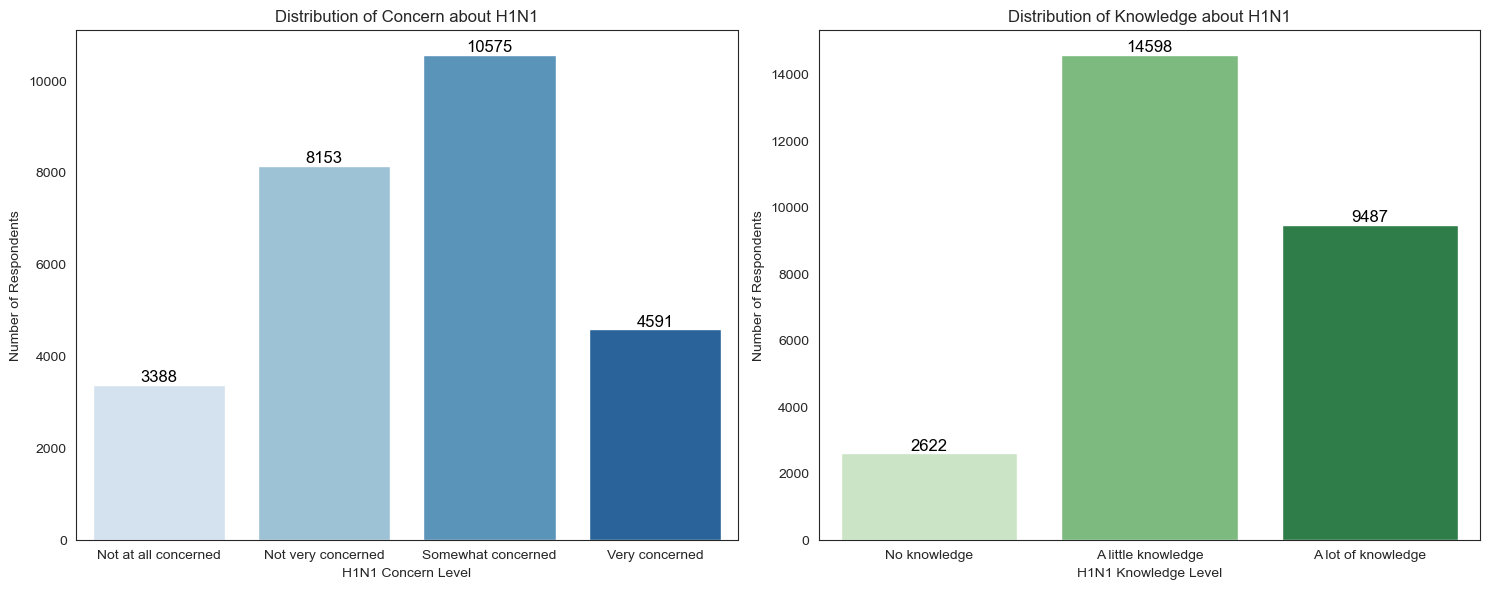

In [13]:
# Set the aesthetic style of the plots
sns.set_style('white')

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the distribution of concern about H1N1 with color fade and data labels
sns.countplot(x='h1n1_concern', data=data, palette='Blues', ax=axes[0])
for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                     textcoords='offset points')
axes[0].set_title('Distribution of Concern about H1N1')
axes[0].set_xlabel('H1N1 Concern Level')
axes[0].set_ylabel('Number of Respondents')
axes[0].set_xticks([0, 1, 2, 3])
axes[0].set_xticklabels(['Not at all concerned', 'Not very concerned', 'Somewhat concerned', 'Very concerned'])

# Plot the distribution of knowledge about H1N1 with color fade and data labels
sns.countplot(x='h1n1_knowledge', data=data, palette='Greens', ax=axes[1])
for p in axes[1].patches:
    axes[1].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                     textcoords='offset points')
axes[1].set_title('Distribution of Knowledge about H1N1')
axes[1].set_xlabel('H1N1 Knowledge Level')
axes[1].set_ylabel('Number of Respondents')
axes[1].set_xticks([0, 1, 2])
axes[1].set_xticklabels(['No knowledge', 'A little knowledge', 'A lot of knowledge'])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

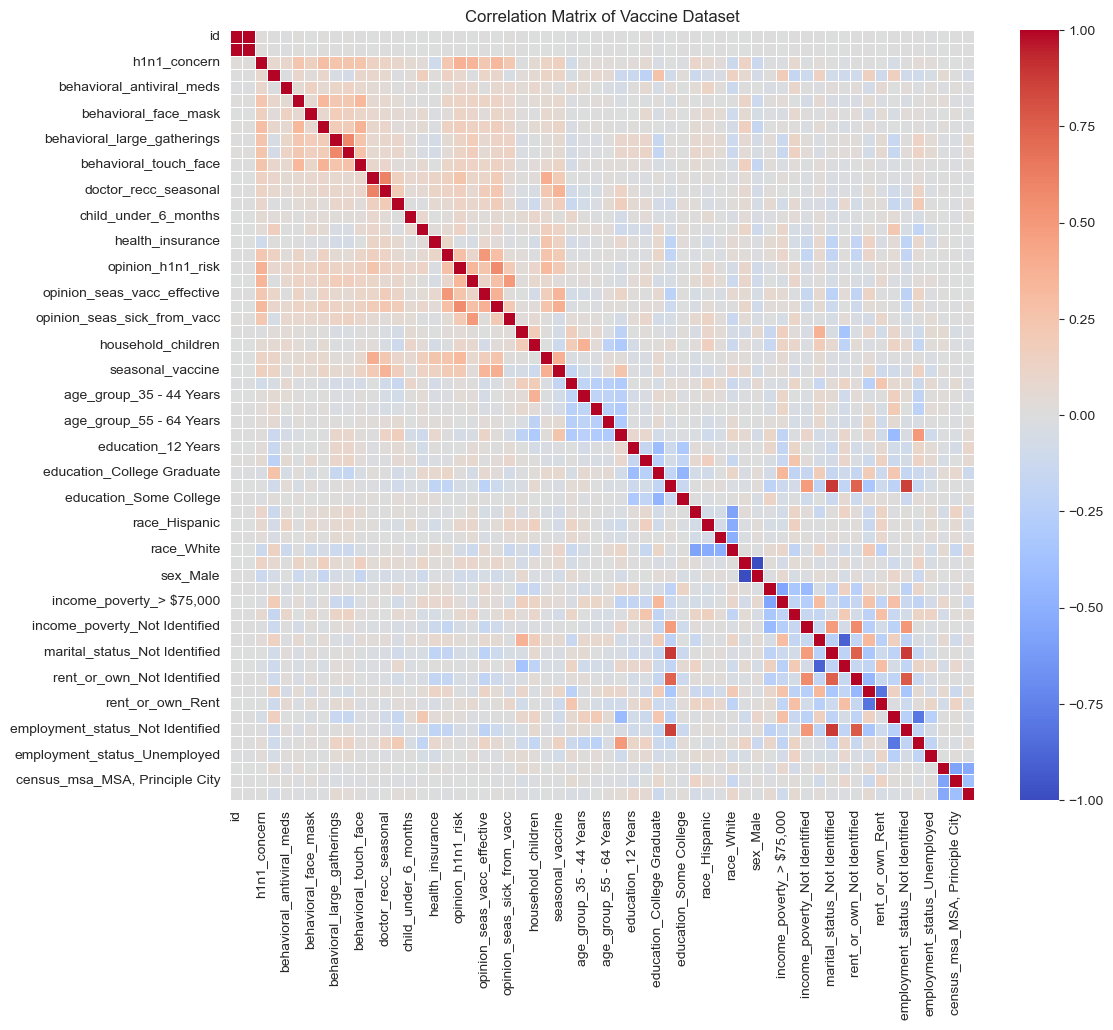

In [14]:
# I have calculated the correlation matrix for the dataset and visualized it using a heatmap to identify any significant relationships between variables. Here's the heatmap:

label_encoders = {}

# Encode categorical variables using one-hot encoding
for column in data.select_dtypes(include=['object']).columns:
    data = pd.get_dummies(data, columns=[column], prefix=[column])
    
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt='.2f', linewidths=.5, annot_kws={'size': 6})
plt.title('Correlation Matrix of Vaccine Dataset')
plt.show()

> - This visualization can help us understand which factors are most strongly associated with the uptake of H1N1 and Seasonal vaccines.

#### Strong correlations with H1N1 and Seasonal vaccine uptake

In [15]:
# Select correlations related to 'h1n1_vaccine' and 'seasonal_vaccine' and sort them
h1n1_corr = correlation_matrix['h1n1_vaccine'].sort_values(ascending=False)
seasonal_corr = correlation_matrix['seasonal_vaccine'].sort_values(ascending=False)

# Filter out strong correlations (greater than 0.1 or less than -0.1)
strong_h1n1_corr = h1n1_corr[np.abs(h1n1_corr) > 0.1]
strong_seasonal_corr = seasonal_corr[np.abs(seasonal_corr) > 0.1]

# Display the strong correlations for H1N1 vaccine
print('Strong correlations with H1N1 vaccine uptake:')
print(strong_h1n1_corr)

# Display the strong correlations for Seasonal vaccine
print('\nStrong correlations with Seasonal vaccine uptake:')
print(strong_seasonal_corr)

Strong correlations with H1N1 vaccine uptake:
h1n1_vaccine                   1.000000
doctor_recc_h1n1               0.394086
seasonal_vaccine               0.377143
opinion_h1n1_risk              0.317980
opinion_h1n1_vacc_effective    0.254815
opinion_seas_risk              0.253290
health_insurance               0.244975
doctor_recc_seasonal           0.218976
opinion_seas_vacc_effective    0.168425
health_worker                  0.168056
h1n1_concern                   0.121664
h1n1_knowledge                 0.117153
Name: h1n1_vaccine, dtype: float64

Strong correlations with Seasonal vaccine uptake:
seasonal_vaccine                        1.000000
opinion_seas_risk                       0.384359
h1n1_vaccine                            0.377143
doctor_recc_seasonal                    0.360696
opinion_seas_vacc_effective             0.344458
age_group_65+ Years                     0.244830
opinion_h1n1_risk                       0.216036
opinion_h1n1_vacc_effective             0.199

I have identified strong correlations with H1N1 and Seasonal vaccine uptake:
- For the H1N1 vaccine, the strongest correlations are with:
- Doctor's recommendation for H1N1 vaccine
- Uptake of the Seasonal vaccine
- Respondent's opinion on the risk of H1N1

For the Seasonal vaccine, the strongest correlations are with:
- Respondent's opinion on the risk of the Seasonal flu
- Uptake of the H1N1 vaccine
- Doctor's recommendation for the Seasonal vaccine

#### Demographic factors (like age, race, sex, income) that influence vaccine uptake

In [16]:
# Load the dataset
file_path = 'H1N1_Flu_Vaccines - Clean.csv'
data = pd.read_csv(file_path)

In [17]:
# Investigate demographic factors influencing vaccine uptake

# Calculate the mean vaccine uptake for different demographic groups
# Age group
age_vaccine_uptake = data.groupby('age_group')[['h1n1_vaccine', 'seasonal_vaccine']].mean()
# Race
group_race_vaccine_uptake = data.groupby('race')[['h1n1_vaccine', 'seasonal_vaccine']].mean()
# Sex
group_sex_vaccine_uptake = data.groupby('sex')[['h1n1_vaccine', 'seasonal_vaccine']].mean()
# Income
group_income_vaccine_uptake = data.groupby('income_poverty')[['h1n1_vaccine', 'seasonal_vaccine']].mean()

# Convert the results to a DataFrame for better formatting
age_df = pd.DataFrame(age_vaccine_uptake).reset_index()
race_df = pd.DataFrame(group_race_vaccine_uptake).reset_index()
sex_df = pd.DataFrame(group_sex_vaccine_uptake).reset_index()
income_df = pd.DataFrame(group_income_vaccine_uptake).reset_index()

# Display the tables
print('Vaccine uptake by age group:')
print(tabulate(age_df, headers='keys', tablefmt='fancy_grid', showindex=False))

print('\nVaccine uptake by race:')
print(tabulate(race_df, headers='keys', tablefmt='fancy_grid', showindex=False))

print('\nVaccine uptake by sex:')
print(tabulate(sex_df, headers='keys', tablefmt='fancy_grid', showindex=False))

print('\nVaccine uptake by income:')
print(tabulate(income_df, headers='keys', tablefmt='fancy_grid', showindex=False))


Vaccine uptake by age group:
╒═══════════════╤════════════════╤════════════════════╕
│ age_group     │   h1n1_vaccine │   seasonal_vaccine │
╞═══════════════╪════════════════╪════════════════════╡
│ 18 - 34 Years │       0.190029 │           0.284564 │
├───────────────┼────────────────┼────────────────────┤
│ 35 - 44 Years │       0.197765 │           0.362526 │
├───────────────┼────────────────┼────────────────────┤
│ 45 - 54 Years │       0.194731 │           0.401298 │
├───────────────┼────────────────┼────────────────────┤
│ 55 - 64 Years │       0.242855 │           0.511235 │
├───────────────┼────────────────┼────────────────────┤
│ 65+ Years     │       0.226655 │           0.673681 │
╘═══════════════╧════════════════╧════════════════════╛

Vaccine uptake by race:
╒═══════════════════╤════════════════╤════════════════════╕
│ race              │   h1n1_vaccine │   seasonal_vaccine │
╞═══════════════════╪════════════════╪════════════════════╡
│ Black             │       0.148725 │

**Let's visualize this**

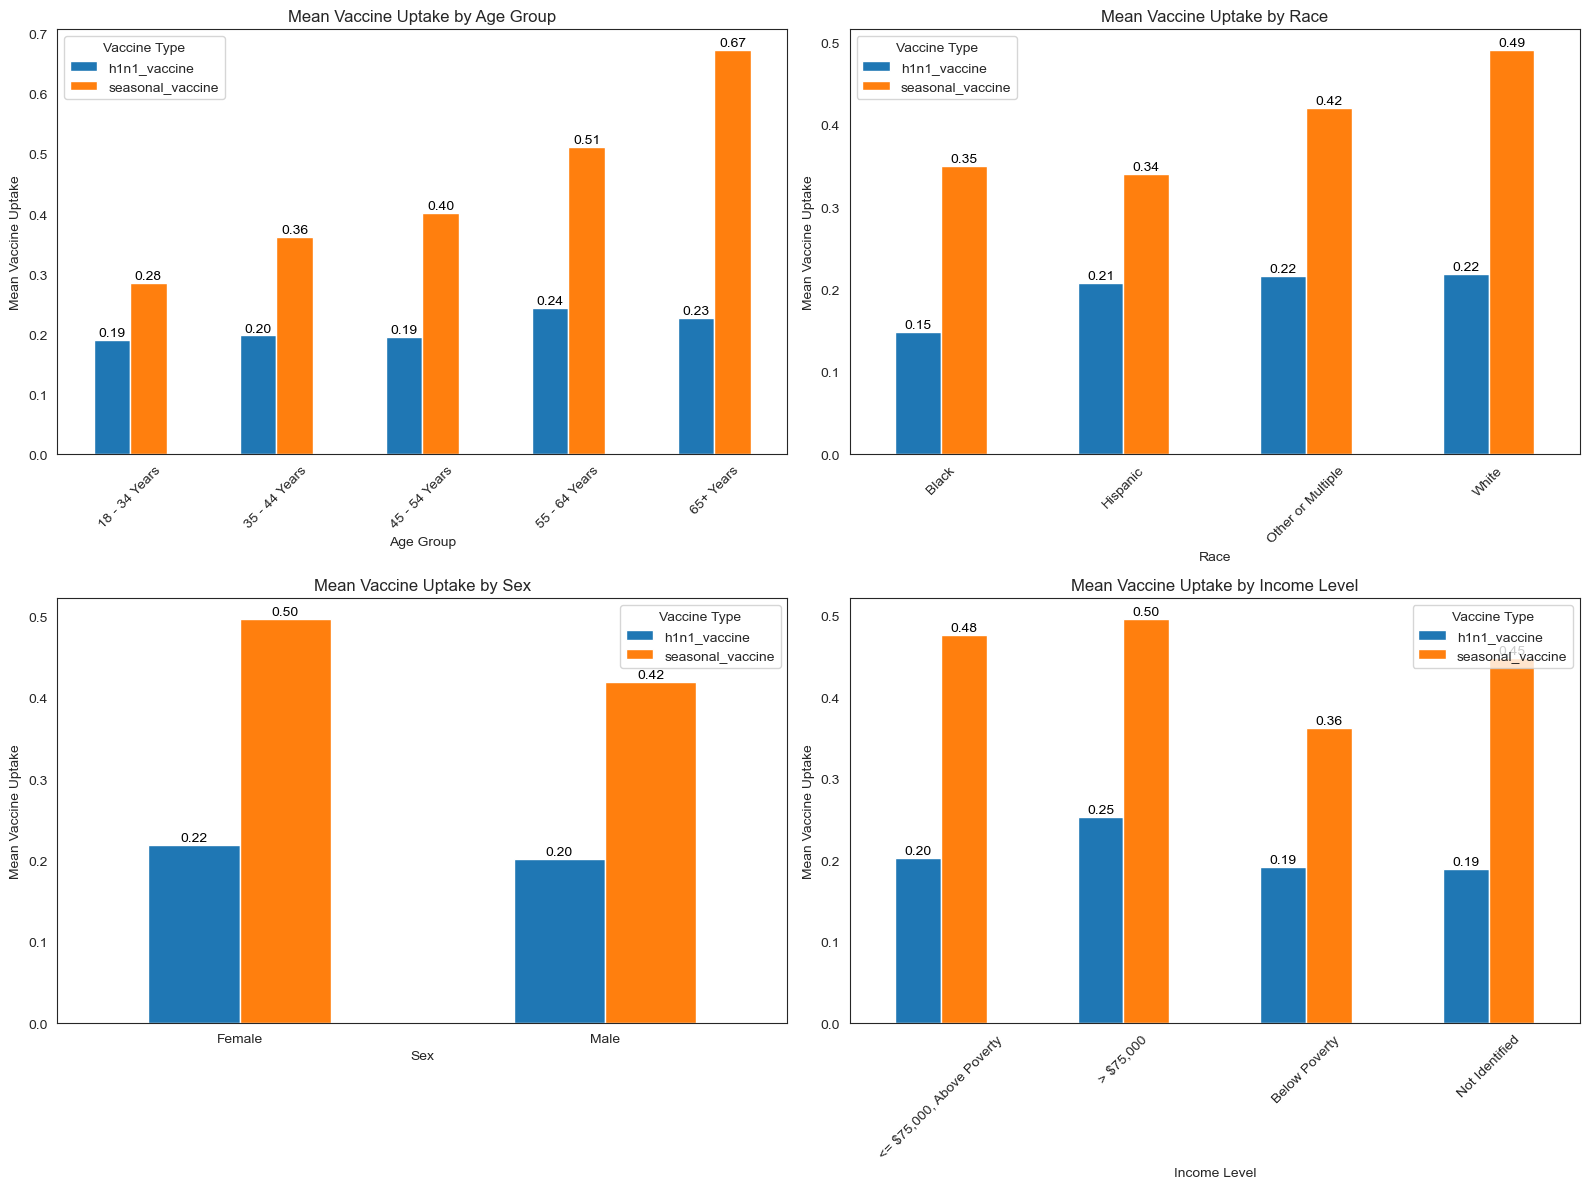

In [18]:
# Visualize the mean vaccine uptake for different demographic groups using bar plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Age group
age_vaccine_uptake.plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Mean Vaccine Uptake by Age Group')
axes[0, 0].set_xlabel('Age Group')
axes[0, 0].set_ylabel('Mean Vaccine Uptake')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].legend(title='Vaccine Type')

# Add data labels for Age group
for p in axes[0, 0].patches:
    axes[0, 0].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                       textcoords='offset points')

# Race
group_race_vaccine_uptake.plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Mean Vaccine Uptake by Race')
axes[0, 1].set_xlabel('Race')
axes[0, 1].set_ylabel('Mean Vaccine Uptake')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].legend(title='Vaccine Type')

# Add data labels for Race
for p in axes[0, 1].patches:
    axes[0, 1].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                       textcoords='offset points')

# Sex
group_sex_vaccine_uptake.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Mean Vaccine Uptake by Sex')
axes[1, 0].set_xlabel('Sex')
axes[1, 0].set_ylabel('Mean Vaccine Uptake')
axes[1, 0].tick_params(axis='x', rotation=0)
axes[1, 0].legend(title='Vaccine Type')

# Add data labels for Sex
for p in axes[1, 0].patches:
    axes[1, 0].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                       textcoords='offset points')

# Income
group_income_vaccine_uptake.plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Mean Vaccine Uptake by Income Level')
axes[1, 1].set_xlabel('Income Level')
axes[1, 1].set_ylabel('Mean Vaccine Uptake')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].legend(title='Vaccine Type')

# Add data labels for Income
for p in axes[1, 1].patches:
    axes[1, 1].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                       textcoords='offset points')

plt.tight_layout()
plt.show()


### Impact of behavioral factors (like hand washing, avoiding close contact) on the likelihood of getting vaccinated.

In [19]:
# Analyze the impact of behavioral factors on the likelihood of getting vaccinated

# Calculate the mean vaccine uptake for behavioral factors
behavioral_factors = ['behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face']
behavior_vaccine_uptake = data[behavioral_factors + ['h1n1_vaccine', 'seasonal_vaccine']].groupby(behavior_factors).mean().reset_index()

# Display the head of the dataframe to show the impact of behavioral factors
print(behavior_vaccine_uptake.head())

NameError: name 'behavior_factors' is not defined

The table above shows the mean vaccine uptake for H1N1 and Seasonal flu across different behavioral factors such as avoidance of certain situations, wearing face masks, hand washing, attending large gatherings, going out of home, and touching one's face. Each row represents a combination of behavioral responses, with the corresponding mean vaccine uptake rates. This data can help understand how individual behaviors may correlate with the likelihood of getting vaccinated.

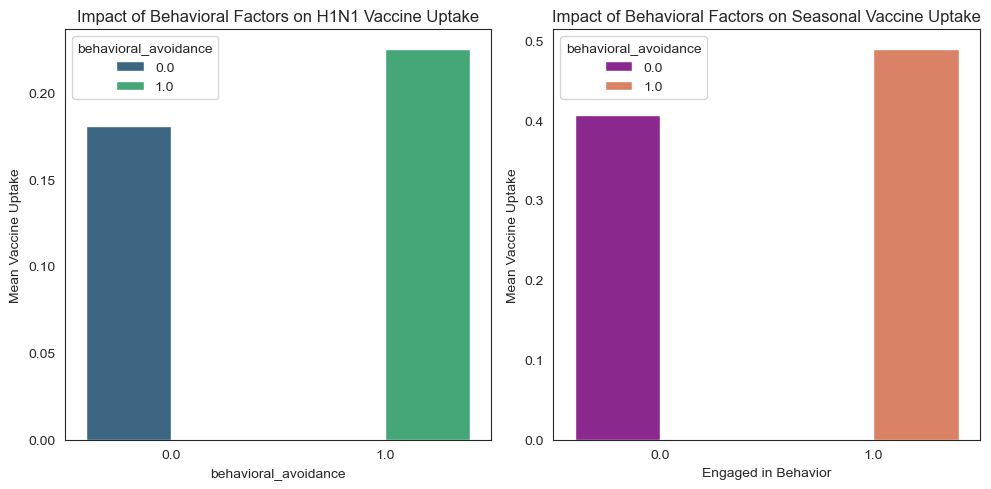

In [20]:
# Visualize the impact of behavioral factors on the likelihood of getting vaccinated using stacked bar plots

# Create a new dataframe to store results
behavioral_impact_stacked = pd.DataFrame()

for factor in behavioral_factors:
    # Calculate the vaccine uptake for each behavior
    uptake = data.groupby(factor)[['h1n1_vaccine', 'seasonal_vaccine']].mean().reset_index()
    uptake.rename(columns={'h1n1_vaccine': factor + '_h1n1', 'seasonal_vaccine': factor + '_seasonal'}, inplace=True)
    behavioral_impact_stacked = pd.concat([behavioral_impact_stacked, uptake], axis=0)

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), sharex=True)

# Stacked bar plot for H1N1 vaccine
sns.barplot(x=behavioral_impact_stacked[behavioral_impact_stacked.columns[0]], y=behavioral_impact_stacked.columns[1], hue='behavioral_avoidance', data=behavioral_impact_stacked, ax=axes[0], palette='viridis')
axes[0].set_title('Impact of Behavioral Factors on H1N1 Vaccine Uptake')
axes[0].set_ylabel('Mean Vaccine Uptake')

# Stacked bar plot for Seasonal vaccine
sns.barplot(x=behavioral_impact_stacked[behavioral_impact_stacked.columns[0]], y=behavioral_impact_stacked.columns[2], hue='behavioral_avoidance', data=behavioral_impact_stacked, ax=axes[1], palette='plasma')
axes[1].set_title('Impact of Behavioral Factors on Seasonal Vaccine Uptake')
axes[1].set_xlabel('Engaged in Behavior')
axes[1].set_ylabel('Mean Vaccine Uptake')

plt.tight_layout()
plt.show()


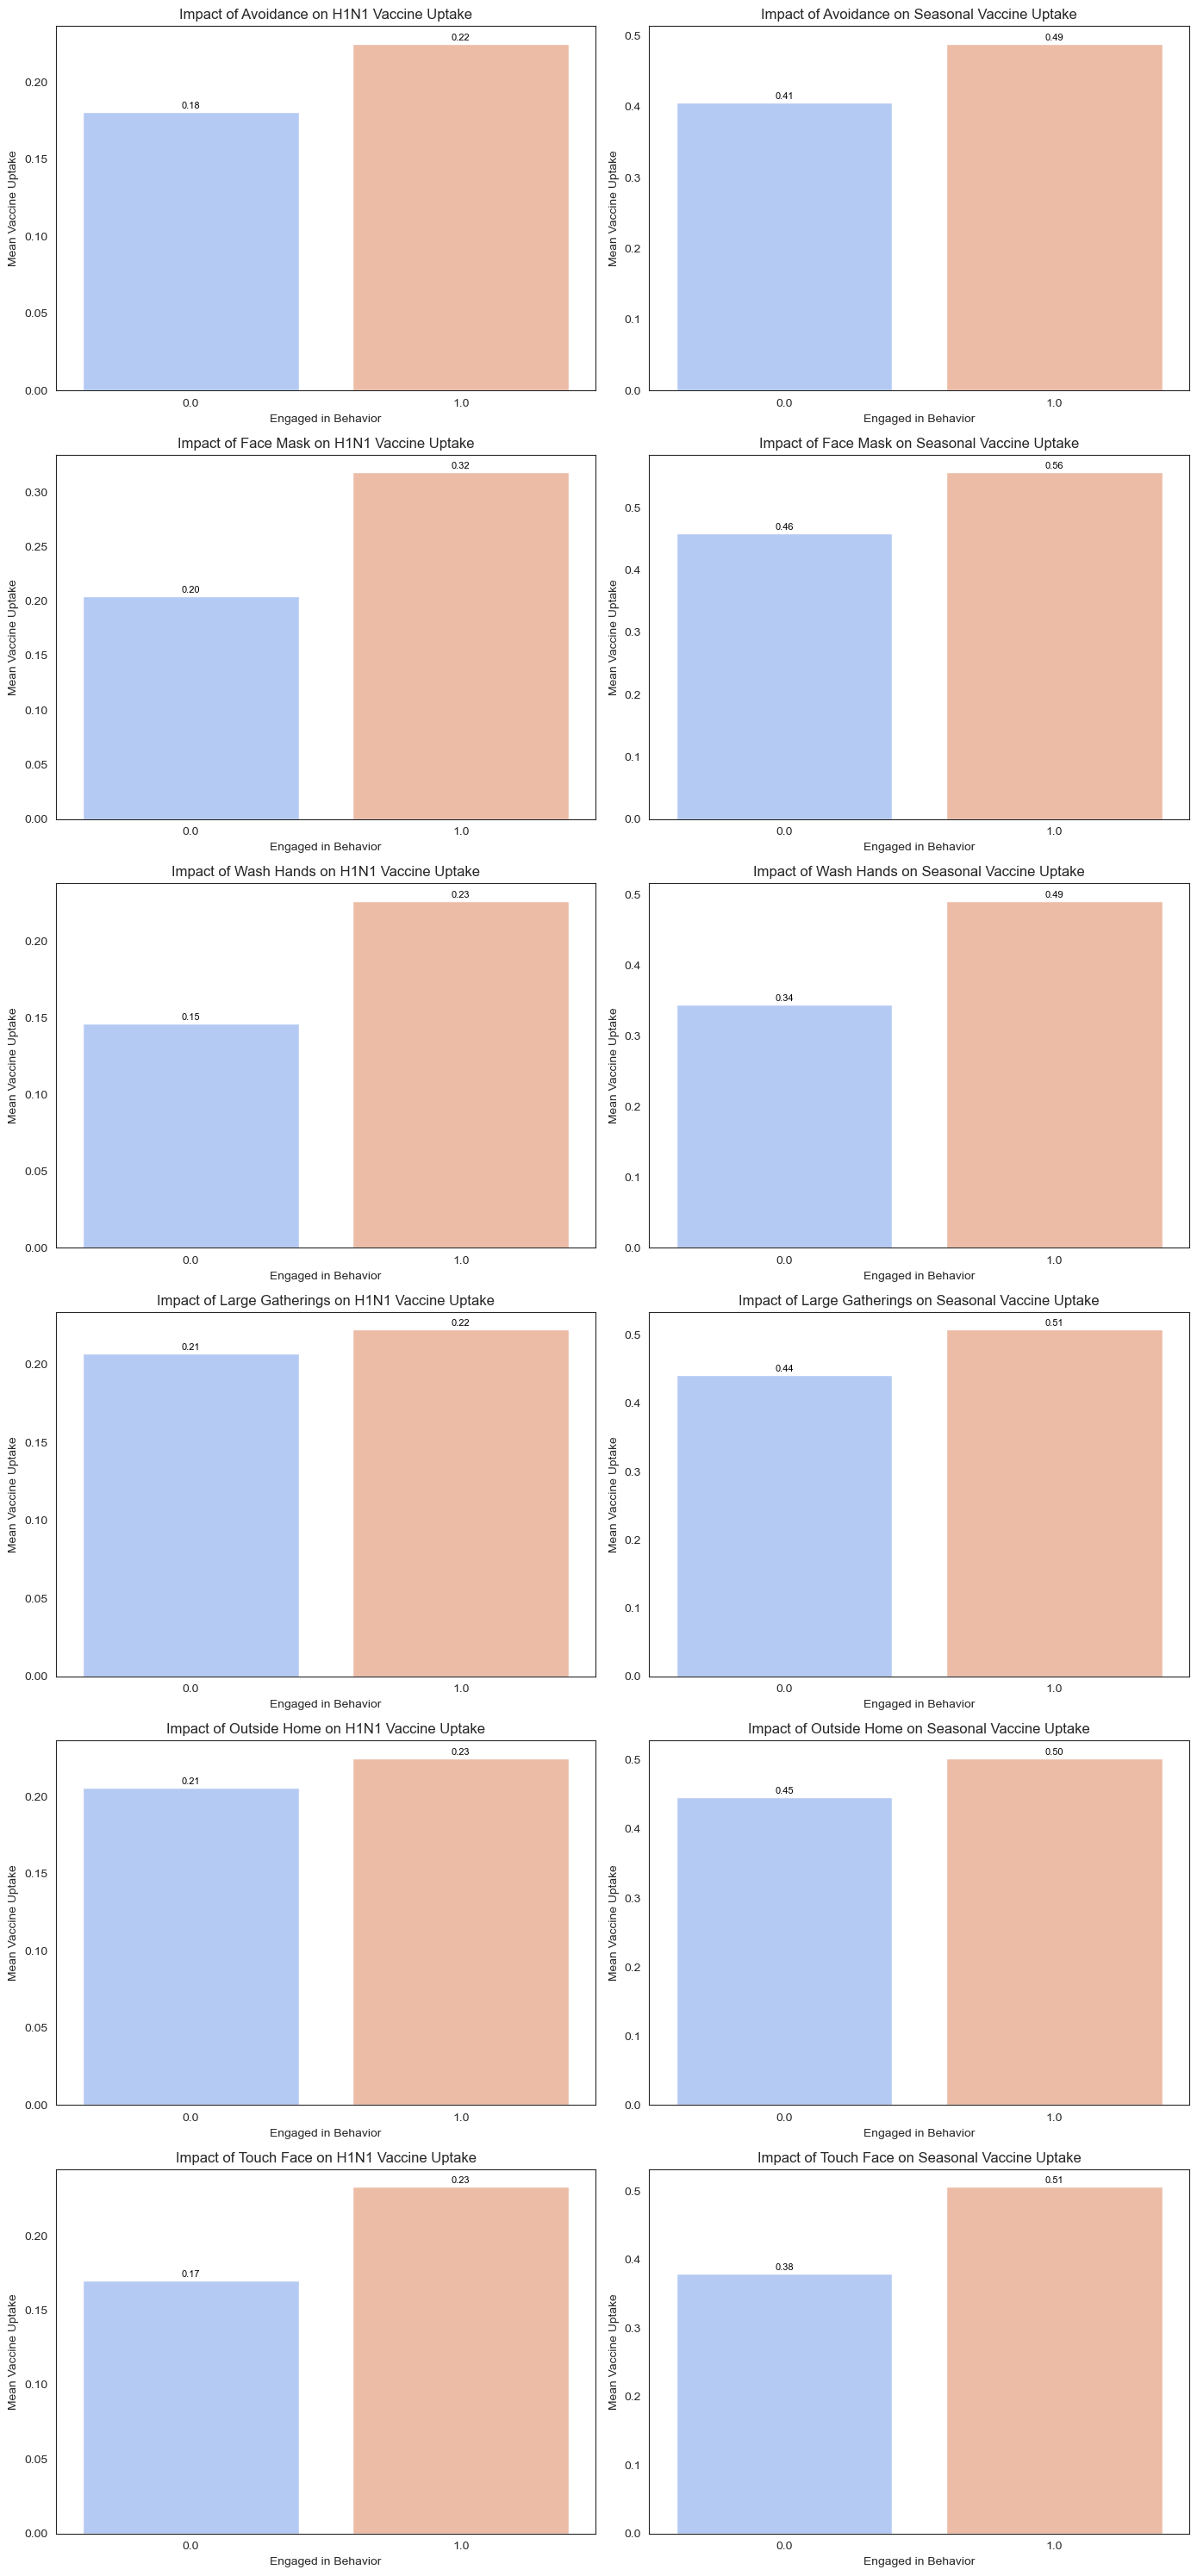

In [21]:
# Visualize the impact of each behavioral factor on the likelihood of getting vaccinated with data labels and a gradient color

fig, axes = plt.subplots(nrows=len(behavioral_factors), ncols=2, figsize=(14, 5 * len(behavioral_factors)))

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.5)

for i, factor in enumerate(behavioral_factors):
    # Bar plot for H1N1 vaccine with coolwarm gradient color
    sns.barplot(x=factor, y=factor + '_h1n1', data=behavioral_impact_stacked, ax=axes[i, 0], palette="coolwarm")
    axes[i, 0].set_title('Impact of ' + factor.replace('behavioral_', '').replace('_', ' ').title() + ' on H1N1 Vaccine Uptake')
    axes[i, 0].set_ylabel('Mean Vaccine Uptake')
    axes[i, 0].set_xlabel('Engaged in Behavior')

    # Add data labels for H1N1 vaccine
    for p in axes[i, 0].patches:
        axes[i, 0].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                            textcoords='offset points')

    # Bar plot for Seasonal vaccine with coolwarm gradient color
    sns.barplot(x=factor, y=factor + '_seasonal', data=behavioral_impact_stacked, ax=axes[i, 1], palette="coolwarm")
    axes[i, 1].set_title('Impact of ' + factor.replace('behavioral_', '').replace('_', ' ').title() + ' on Seasonal Vaccine Uptake')
    axes[i, 1].set_ylabel('Mean Vaccine Uptake')
    axes[i, 1].set_xlabel('Engaged in Behavior')

    # Add data labels for Seasonal vaccine
    for p in axes[i, 1].patches:
        axes[i, 1].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                            textcoords='offset points')

plt.tight_layout()
plt.show()


#### Role of geographical location on vaccine uptake rates.


***reload the data then run the code below***

In [22]:
vaccine_uptake_by_location = data.groupby('census_msa')[['h1n1_vaccine', 'seasonal_vaccine']].mean().reset_index()

# Display the head of the resulting dataframe
print(vaccine_uptake_by_location.head())

                 census_msa  h1n1_vaccine  seasonal_vaccine
0  MSA, Not Principle  City      0.211851          0.478231
1       MSA, Principle City      0.213759          0.453713
2                   Non-MSA      0.212003          0.458183


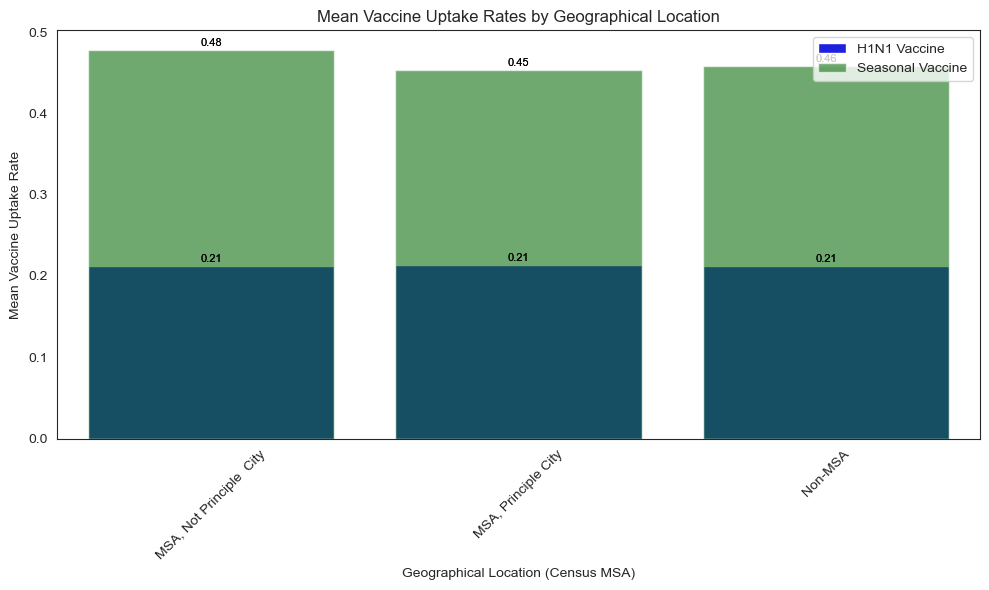

In [23]:
plt.figure(figsize=(10, 6))

# Plotting the H1N1 vaccine uptake
h1n1_plot = sns.barplot(x='census_msa', y='h1n1_vaccine', data=vaccine_uptake_by_location, color='blue', label='H1N1 Vaccine')

# Plotting the seasonal vaccine uptake
seasonal_plot = sns.barplot(x='census_msa', y='seasonal_vaccine', data=vaccine_uptake_by_location, color='green', alpha=0.6, label='Seasonal Vaccine')

plt.title('Mean Vaccine Uptake Rates by Geographical Location')
plt.xlabel('Geographical Location (Census MSA)')
plt.ylabel('Mean Vaccine Uptake Rate')
plt.legend()

# Adding data labels for H1N1 vaccine
for p in h1n1_plot.patches:
    plt.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                 textcoords='offset points')

# Adding data labels for seasonal vaccine
for p in seasonal_plot.patches:
    plt.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                 textcoords='offset points')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Relationship between respondents' employment status and their vaccination status

h1n1_vaccine            0     1
employment_status              
Employed            10637  2923
Not Identified       1192   271
Not in Labor Force   7988  2243
Unemployed           1216   237


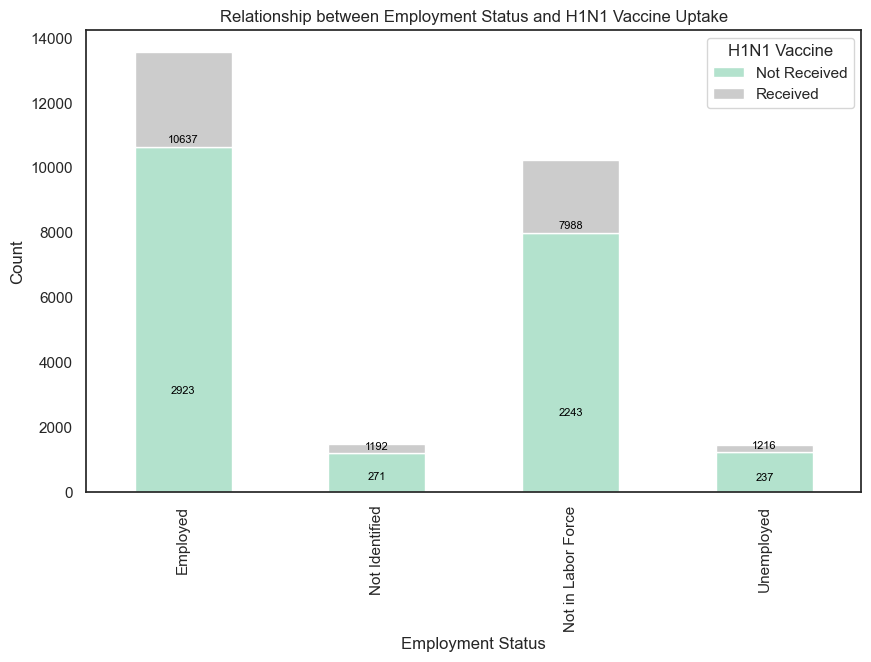

In [24]:
contingency_table = pd.crosstab(data['employment_status'], data['h1n1_vaccine'])

# Display the contingency table
print(contingency_table)

# Create a stacked bar plot with a gradient color
sns.set(style="white")
ax = contingency_table.plot(kind='bar', stacked=True, colormap='Pastel2', figsize=(10, 6))
plt.title('Relationship between Employment Status and H1N1 Vaccine Uptake')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.legend(title='H1N1 Vaccine', labels=['Not Received', 'Received'])

for p in ax.patches:
    height = p.get_height()
    if height != 0:  # Exclude bars with zero height
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                    textcoords='offset points')
plt.show()


### Determine if there's a significant difference in vaccine uptake between people with different chronic health conditions.

In [25]:
h1n1_contingency_table = pd.crosstab(data['chronic_med_condition'], data['h1n1_vaccine'])
print(h1n1_contingency_table)


h1n1_vaccine               0     1
chronic_med_condition             
0                      15751  3666
1                       5282  2008


In [26]:
seasonal_contingency_table = pd.crosstab(data['chronic_med_condition'], data['seasonal_vaccine'])
print(seasonal_contingency_table)


seasonal_vaccine           0     1
chronic_med_condition             
0                      11382  8035
1                       2890  4400


**Perform Chi-Square Test:**


In [27]:
chi2_1, p1, _, _ = chi2_contingency(h1n1_contingency_table)
chi2_2, p2, _, _ = chi2_contingency(seasonal_contingency_table)
print(f"H1N1 Chi-Square Value: {chi2_1}")
print(f"P-Value: {p1}")

print(f"Seasonal Chi-Square Value: {chi2_2}")
print(f"P-Value: {p2}")

H1N1 Chi-Square Value: 237.2776362003578
P-Value: 1.5428233060113362e-53
Seasonal Chi-Square Value: 766.2201795832589
P-Value: 1.1928898604662591e-168


In [28]:
alpha = 0.05
if p1 < alpha:
    print("There is a significant difference in H1N1 vaccine uptake between people with different chronic health conditions.")
else:
    print("There is no significant difference in H1N1 vaccine uptake between people with different chronic health conditions.")

There is a significant difference in H1N1 vaccine uptake between people with different chronic health conditions.


In [29]:
if p2 < alpha:
    print("There is a significant difference in Seasonal vaccine uptake between people with different chronic health conditions.")
else:
    print("There is no significant difference in Seasonal vaccine uptake between people with different chronic health conditions.")

There is a significant difference in Seasonal vaccine uptake between people with different chronic health conditions.


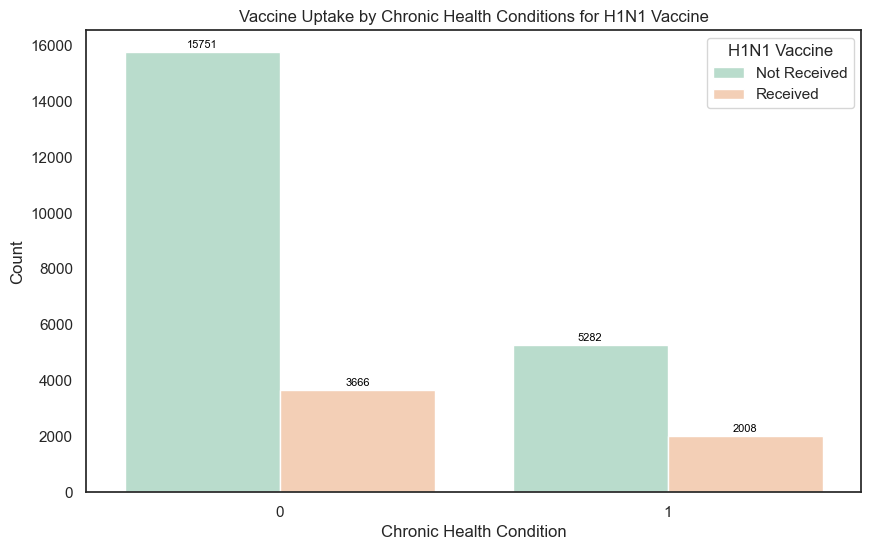

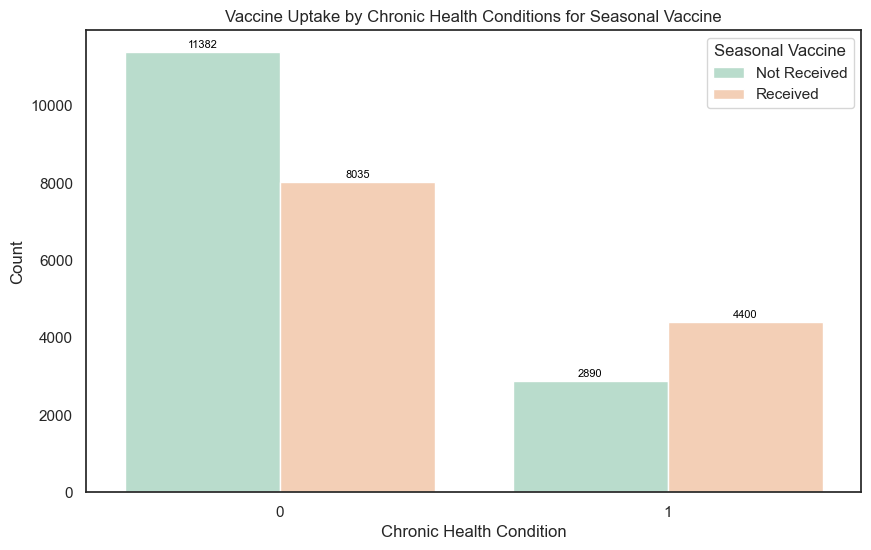

In [30]:
# Function to add data labels
def add_data_labels(ax):
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                     textcoords='offset points')

# Stacked bar plot for H1N1 vaccine
plt.figure(figsize=(10, 6))
ax1 = sns.countplot(x='chronic_med_condition', hue='h1n1_vaccine', data=data, palette='Pastel2')

# Add data labels for H1N1 vaccine
add_data_labels(ax1)

plt.title('Vaccine Uptake by Chronic Health Conditions for H1N1 Vaccine')
plt.xlabel('Chronic Health Condition')
plt.ylabel('Count')
plt.legend(title='H1N1 Vaccine', labels=['Not Received', 'Received'])
plt.show()

# Stacked bar plot for seasonal vaccine
plt.figure(figsize=(10, 6))
ax2 = sns.countplot(x='chronic_med_condition', hue='seasonal_vaccine', data=data, palette='Pastel2')

# Add data labels for seasonal vaccine
add_data_labels(ax2)

plt.title('Vaccine Uptake by Chronic Health Conditions for Seasonal Vaccine')
plt.xlabel('Chronic Health Condition')
plt.ylabel('Count')
plt.legend(title='Seasonal Vaccine', labels=['Not Received', 'Received'])
plt.show()

#### Assess the effect of respondents' attitudes towards vaccines in general on their decision to get the H1N1 and Seasonal flu vaccines.

In [31]:
# Assuming 'opinion_h1n1_vacc_effective' and 'opinion_seas_vacc_effective' are columns representing attitudes
contingency_table_h1n1_attitude = pd.crosstab(data['opinion_h1n1_vacc_effective'], data['h1n1_vaccine'])
contingency_table_seasonal_attitude = pd.crosstab(data['opinion_seas_vacc_effective'], data['seasonal_vaccine'])


In [32]:
chi2_h1n1, p_h1n1, _, _ = chi2_contingency(contingency_table_h1n1_attitude)
chi2_seasonal, p_seasonal, _, _ = chi2_contingency(contingency_table_seasonal_attitude)

print(f"H1N1 Vaccine - Chi-Square Value: {chi2_h1n1}, P-Value: {p_h1n1}")
print(f"Seasonal Vaccine - Chi-Square Value: {chi2_seasonal}, P-Value: {p_seasonal}")

H1N1 Vaccine - Chi-Square Value: 2396.6965315459356, P-Value: 0.0
Seasonal Vaccine - Chi-Square Value: 4150.120326928804, P-Value: 0.0


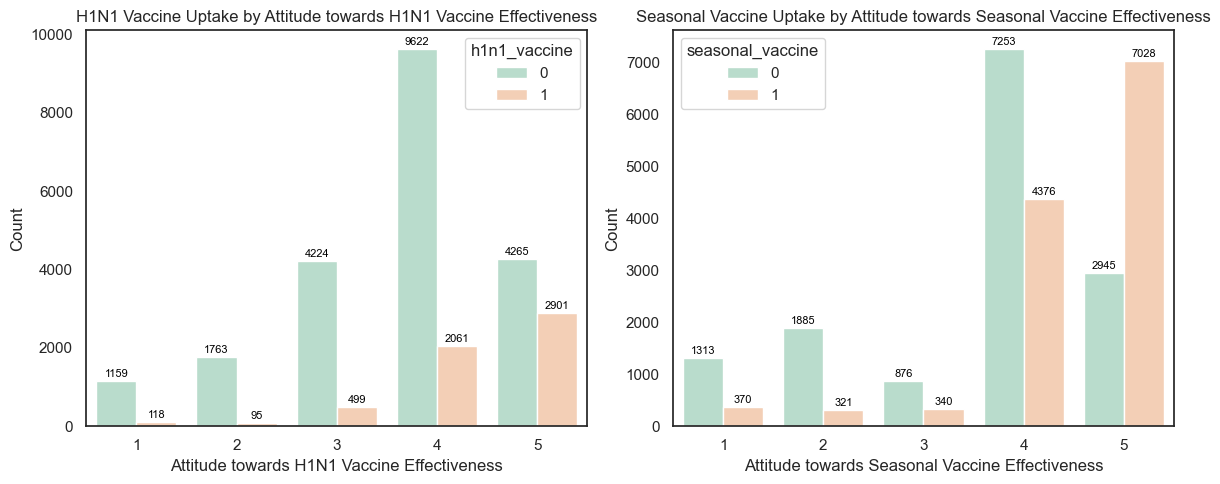

In [33]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
ax1 = sns.countplot(x='opinion_h1n1_vacc_effective', hue='h1n1_vaccine', data=data, palette='Pastel2')

# Add Data Labels for H1N1 Vaccine
for p in ax1.patches:
    height = p.get_height()
    ax1.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                 ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                 textcoords='offset points')

plt.title('H1N1 Vaccine Uptake by Attitude towards H1N1 Vaccine Effectiveness')
plt.xlabel('Attitude towards H1N1 Vaccine Effectiveness')
plt.ylabel('Count')

# Plot Grouped Bar Plot for Seasonal Vaccine
plt.subplot(1, 2, 2)
ax2 = sns.countplot(x='opinion_seas_vacc_effective', hue='seasonal_vaccine', data=data, palette='Pastel2')

# Add Data Labels for Seasonal Vaccine
for p in ax2.patches:
    height = p.get_height()
    ax2.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                 ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                 textcoords='offset points')

plt.title('Seasonal Vaccine Uptake by Attitude towards Seasonal Vaccine Effectiveness')
plt.xlabel('Attitude towards Seasonal Vaccine Effectiveness')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

### Build a Machine learning model to predict the likelihood of receiving a H1N1 Vaccine and/or a Seasonal Vaccine

In [34]:
# Select relevant columns for the model
features = ['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance',
            'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings',
            'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1', 'chronic_med_condition',
            'child_under_6_months', 'health_worker', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk']


In [35]:
# Separate features and target variables for H1N1 vaccine
X_h1n1 = data[features]
y_h1n1 = data['h1n1_vaccine']

# Separate features and target variables for seasonal vaccine
X_seasonal = data[features]
y_seasonal = data['seasonal_vaccine']

In [36]:

# Split the data into training and testing sets
X_train_h1n1, X_test_h1n1, y_train_h1n1, y_test_h1n1 = train_test_split(X_h1n1, y_h1n1, test_size=0.2, random_state=42)
X_train_seasonal, X_test_seasonal, y_train_seasonal, y_test_seasonal = train_test_split(X_seasonal, y_seasonal, test_size=0.2, random_state=42)


In [59]:

# Standardize the features
scaler = StandardScaler()
X_train_h1n1 = scaler.fit_transform(X_train_h1n1)
X_test_h1n1 = scaler.transform(X_test_h1n1)

X_train_seasonal = scaler.fit_transform(X_train_seasonal)
X_test_seasonal = scaler.transform(X_test_seasonal)

#### Logistic Regression

In [60]:
# Create and train the logistic regression model for H1N1 vaccine
model_h1n1 = LogisticRegression(random_state=42)
model_h1n1.fit(X_train_h1n1, y_train_h1n1)



LogisticRegression(random_state=42)

In [61]:

# Create and train the logistic regression model for seasonal vaccine
model_seasonal = LogisticRegression(random_state=42)
model_seasonal.fit(X_train_seasonal, y_train_seasonal)


LogisticRegression(random_state=42)

In [62]:
# Make predictions for H1N1 vaccine
predictions_h1n1 = model_h1n1.predict(X_test_h1n1)

In [63]:
# Make predictions for seasonal vaccine
predictions_seasonal = model_seasonal.predict(X_test_seasonal)

In [64]:

# Evaluate the model for H1N1 vaccine
print("H1N1 Vaccine Model Evaluation:")
print(confusion_matrix(y_test_h1n1, predictions_h1n1))
print(classification_report(y_test_h1n1, predictions_h1n1))
print(f"Accuracy: {accuracy_score(y_test_h1n1, predictions_h1n1)}\n")


H1N1 Vaccine Model Evaluation:
[[4012  200]
 [ 684  446]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      4212
           1       0.69      0.39      0.50      1130

    accuracy                           0.83      5342
   macro avg       0.77      0.67      0.70      5342
weighted avg       0.82      0.83      0.82      5342

Accuracy: 0.8345189067764882



In [66]:
# Create confusion matrix for H1N1 vaccine
confusionmatrix_h1n1 = confusion_matrix(y_test_h1n1, predictions_h1n1)

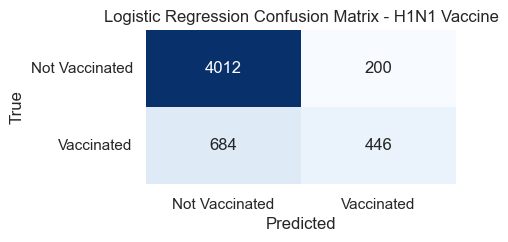

In [68]:
# Plot confusion matrix for H1N1 vaccine
plt.figure(figsize=(4, 2))
sns.heatmap(confusionmatrix_h1n1, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Vaccinated', 'Vaccinated'],
            yticklabels=['Not Vaccinated', 'Vaccinated'])
plt.title('Logistic Regression Confusion Matrix - H1N1 Vaccine')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [69]:

# Evaluate the model for seasonal vaccine
print("Seasonal Vaccine Model Evaluation:")
print(confusion_matrix(y_test_seasonal, predictions_seasonal))
print(classification_report(y_test_seasonal, predictions_seasonal))
print(f"Accuracy: {accuracy_score(y_test_seasonal, predictions_seasonal)}")


Seasonal Vaccine Model Evaluation:
[[2182  709]
 [1114 1337]]
              precision    recall  f1-score   support

           0       0.66      0.75      0.71      2891
           1       0.65      0.55      0.59      2451

    accuracy                           0.66      5342
   macro avg       0.66      0.65      0.65      5342
weighted avg       0.66      0.66      0.65      5342

Accuracy: 0.6587420441782104


In [70]:
# Create confusion matrix for seasonal vaccine
confusionmatrix_seasonal = confusion_matrix(y_test_seasonal, predictions_seasonal)

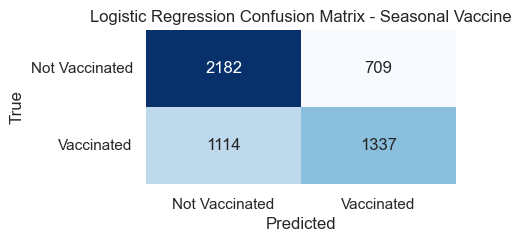

In [71]:
# Plot confusion matrix for seasonal vaccine
plt.figure(figsize=(4, 2))
sns.heatmap(confusionmatrix_seasonal, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Vaccinated', 'Vaccinated'],
            yticklabels=['Not Vaccinated', 'Vaccinated'])
plt.title('Logistic Regression Confusion Matrix - Seasonal Vaccine')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### Random Tree Forest

In [72]:
# Create and train Random Forest models for H1N1 and seasonal vaccines
rf_h1n1 = RandomForestClassifier(random_state=42)
rf_seasonal = RandomForestClassifier(random_state=42)

In [73]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [74]:
grid_search_h1n1 = GridSearchCV(rf_h1n1, param_grid, cv=5, scoring='accuracy')
grid_search_seasonal = GridSearchCV(rf_seasonal, param_grid, cv=5, scoring='accuracy')


In [75]:
grid_search_h1n1.fit(X_train_h1n1, y_train_h1n1)
grid_search_seasonal.fit(X_train_seasonal, y_train_seasonal)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [76]:
# Get the best models from the grid search
best_rf_h1n1 = grid_search_h1n1.best_estimator_
best_rf_seasonal = grid_search_seasonal.best_estimator_

In [77]:
# Make predictions for H1N1 vaccine
rf_predictions_h1n1 = best_rf_h1n1.predict(X_test_h1n1)

In [78]:
# Make predictions for seasonal vaccine
rf_predictions_seasonal = best_rf_seasonal.predict(X_test_seasonal)

In [79]:
# Evaluate the model for H1N1 vaccine
print("H1N1 Vaccine Model Evaluation:")
print(confusion_matrix(y_test_h1n1, rf_predictions_h1n1))
print(classification_report(y_test_h1n1, rf_predictions_h1n1))
print(f"Accuracy: {accuracy_score(y_test_h1n1, rf_predictions_h1n1)}\n")


H1N1 Vaccine Model Evaluation:
[[4031  181]
 [ 687  443]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      4212
           1       0.71      0.39      0.51      1130

    accuracy                           0.84      5342
   macro avg       0.78      0.67      0.70      5342
weighted avg       0.82      0.84      0.82      5342

Accuracy: 0.8375140396855111



In [80]:
# Create confusion matrix for H1N1 vaccine
rf_cm_h1n1 = confusion_matrix(y_test_h1n1, rf_predictions_h1n1)

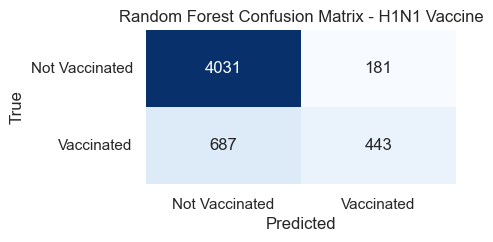

In [81]:
# Plot confusion matrix for H1N1 vaccine
plt.figure(figsize=(4, 2))
sns.heatmap(rf_cm_h1n1, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Vaccinated', 'Vaccinated'],
            yticklabels=['Not Vaccinated', 'Vaccinated'])
plt.title('Random Forest Confusion Matrix - H1N1 Vaccine')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [82]:
# Evaluate the model for seasonal vaccine
print("Seasonal Vaccine Model Evaluation:")
print(confusion_matrix(y_test_seasonal, rf_predictions_seasonal))
print(classification_report(y_test_seasonal, rf_predictions_seasonal))
print(f"Accuracy: {accuracy_score(y_test_seasonal, rf_predictions_seasonal)}")

Seasonal Vaccine Model Evaluation:
[[2150  741]
 [1092 1359]]
              precision    recall  f1-score   support

           0       0.66      0.74      0.70      2891
           1       0.65      0.55      0.60      2451

    accuracy                           0.66      5342
   macro avg       0.66      0.65      0.65      5342
weighted avg       0.66      0.66      0.65      5342

Accuracy: 0.6568700861100711


In [83]:
# Create confusion matrix for seasonal vaccine
rf_cm_seasonal = confusion_matrix(y_test_seasonal, rf_predictions_seasonal)

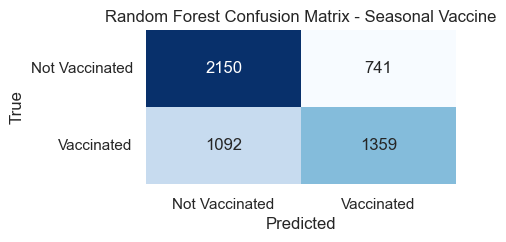

In [84]:
# Plot confusion matrix for seasonal vaccine
plt.figure(figsize=(4, 2))
sns.heatmap(rf_cm_seasonal, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Vaccinated', 'Vaccinated'],
            yticklabels=['Not Vaccinated', 'Vaccinated'])
plt.title('Random Forest Confusion Matrix - Seasonal Vaccine')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Support Vector Machines (SVM)

In [85]:
# Create an SVM model for H1N1 vaccine
svm_h1n1 = SVC(random_state=42)

In [86]:
# Create an SVM model for H1N1 vaccine
svm_seasonal = SVC(random_state=42)

In [87]:
# Hyperparameter tuning using GridSearchCV for H1N1 vaccine
param_grid_h1n1 = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}


In [88]:
# Hyperparameter tuning using GridSearchCV for Seasonal vaccine
param_grid_seasonal = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

In [89]:
svm_grid_search_h1n1 = GridSearchCV(svm_h1n1, param_grid_h1n1, cv=5, scoring='accuracy')
svm_grid_search_h1n1.fit(X_train_h1n1, y_train_h1n1)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [90]:
svm_grid_search_seasonal = GridSearchCV(svm_seasonal, param_grid_seasonal, cv=5, scoring='accuracy')
svm_grid_search_seasonal.fit(X_train_seasonal, y_train_seasonal)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [91]:
# Get the best model from the grid search for H1N1 vaccine
best_svm_h1n1 = svm_grid_search_h1n1.best_estimator_

In [92]:
# Get the best model from the grid search for seasonal vaccine
best_svm_seasonal = svm_grid_search_seasonal.best_estimator_

In [93]:
# Make predictions for H1N1 vaccine
svm_predictions_h1n1 = best_svm_h1n1.predict(X_test_h1n1)
# Make predictions for seasonal vaccine
svm_predictions_seasonal = best_svm_seasonal.predict(X_test_seasonal)

In [94]:
# Evaluate the model for H1N1 vaccine
print("H1N1 Vaccine Model Evaluation:")
print(confusion_matrix(y_test_h1n1, svm_predictions_h1n1))
print(classification_report(y_test_h1n1, svm_predictions_h1n1))
print(f"Accuracy: {accuracy_score(y_test_h1n1, svm_predictions_h1n1)}\n")

H1N1 Vaccine Model Evaluation:
[[3981  231]
 [ 664  466]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4212
           1       0.67      0.41      0.51      1130

    accuracy                           0.83      5342
   macro avg       0.76      0.68      0.70      5342
weighted avg       0.82      0.83      0.82      5342

Accuracy: 0.832459752901535



In [95]:
# Create confusion matrix for H1N1 vaccine
svm_cm_h1n1 = confusion_matrix(y_test_h1n1, svm_predictions_h1n1)


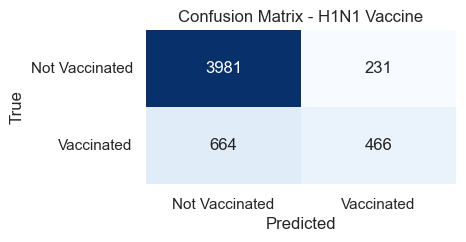

In [96]:
# Plot confusion matrix for H1N1 vaccine
plt.figure(figsize=(4, 2))
sns.heatmap(svm_cm_h1n1, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Vaccinated', 'Vaccinated'],
            yticklabels=['Not Vaccinated', 'Vaccinated'])
plt.title('Confusion Matrix - H1N1 Vaccine')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [97]:
# Evaluate the model for seasonal vaccine
print("Seasonal Vaccine Model Evaluation:")
print(confusion_matrix(y_test_seasonal, svm_predictions_seasonal))
print(classification_report(y_test_seasonal, svm_predictions_seasonal))
print(f"Accuracy: {accuracy_score(y_test_seasonal, svm_predictions_seasonal)}")

Seasonal Vaccine Model Evaluation:
[[2164  727]
 [1119 1332]]
              precision    recall  f1-score   support

           0       0.66      0.75      0.70      2891
           1       0.65      0.54      0.59      2451

    accuracy                           0.65      5342
   macro avg       0.65      0.65      0.65      5342
weighted avg       0.65      0.65      0.65      5342

Accuracy: 0.65443654062149


In [98]:
# Create confusion matrix for seasonal vaccine
svm_cm_seasonal = confusion_matrix(y_test_seasonal, svm_predictions_seasonal)

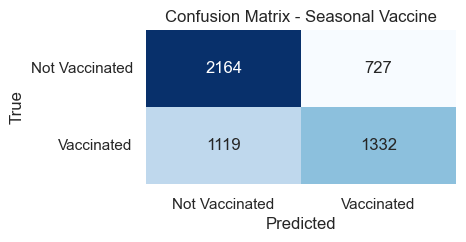

In [99]:
# Plot confusion matrix for seasonal vaccine
plt.figure(figsize=(4, 2))
sns.heatmap(svm_cm_seasonal, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Vaccinated', 'Vaccinated'],
            yticklabels=['Not Vaccinated', 'Vaccinated'])
plt.title('Confusion Matrix - Seasonal Vaccine')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### K-NN

In [100]:
# Create a k-NN model for H1N1 vaccine
knn_h1n1 = KNeighborsClassifier()

In [101]:
# Create a k-NN model for seasonal vaccine
knn_seasonal = KNeighborsClassifier()

In [102]:
# Hyperparameter tuning using GridSearchCV for H1N1 vaccine
param_grid_h1n1 = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

In [103]:
# Hyperparameter tuning using GridSearchCV for seasonal vaccine
param_grid_seasonal = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

In [104]:
knn_grid_search_h1n1 = GridSearchCV(knn_h1n1, param_grid_h1n1, cv=5, scoring='accuracy')
knn_grid_search_h1n1.fit(X_train_h1n1, y_train_h1n1)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [105]:
knn_grid_search_seasonal = GridSearchCV(knn_seasonal, param_grid_seasonal, cv=5, scoring='accuracy')
knn_grid_search_seasonal.fit(X_train_seasonal, y_train_seasonal)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [106]:
# Get the best model from the grid search for H1N1 vaccine
best_knn_h1n1 = knn_grid_search_h1n1.best_estimator_

In [107]:
# Get the best model from the grid search for seasonal vaccine
best_knn_seasonal = knn_grid_search_seasonal.best_estimator_

In [108]:
# Make predictions for H1N1 vaccine
knn_predictions_h1n1 = best_knn_h1n1.predict(X_test_h1n1)

In [109]:
# Make predictions for seasonal vaccine
knn_predictions_seasonal = best_knn_seasonal.predict(X_test_seasonal)

In [110]:
# Evaluate the model for H1N1 vaccine
print("H1N1 Vaccine Model Evaluation:")
print(confusion_matrix(y_test_h1n1, knn_predictions_h1n1))
print(classification_report(y_test_h1n1, knn_predictions_h1n1))
print(f"Accuracy: {accuracy_score(y_test_h1n1, knn_predictions_h1n1)}\n")

H1N1 Vaccine Model Evaluation:
[[3929  283]
 [ 687  443]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      4212
           1       0.61      0.39      0.48      1130

    accuracy                           0.82      5342
   macro avg       0.73      0.66      0.68      5342
weighted avg       0.80      0.82      0.80      5342

Accuracy: 0.8184200673904904



In [111]:
# Create confusion matrix for H1N1 vaccine
knn_cm_h1n1 = confusion_matrix(y_test_h1n1, knn_predictions_h1n1)

# Create confusion matrix for seasonal vaccine
knn_cm_seasonal = confusion_matrix(y_test_seasonal, knn_predictions_seasonal)

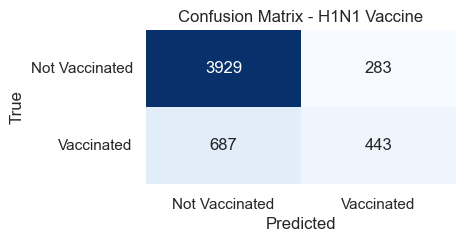

In [112]:
# Plot confusion matrix for H1N1 vaccine
plt.figure(figsize=(4, 2))
sns.heatmap(knn_cm_h1n1, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Vaccinated', 'Vaccinated'],
            yticklabels=['Not Vaccinated', 'Vaccinated'])
plt.title('Confusion Matrix - H1N1 Vaccine')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [113]:
# Evaluate the model for seasonal vaccine
print("Seasonal Vaccine Model Evaluation:")
print(confusion_matrix(y_test_seasonal, predictions_seasonal))
print(classification_report(y_test_seasonal, predictions_seasonal))
print(f"Accuracy: {accuracy_score(y_test_seasonal, predictions_seasonal)}")

Seasonal Vaccine Model Evaluation:
[[2182  709]
 [1114 1337]]
              precision    recall  f1-score   support

           0       0.66      0.75      0.71      2891
           1       0.65      0.55      0.59      2451

    accuracy                           0.66      5342
   macro avg       0.66      0.65      0.65      5342
weighted avg       0.66      0.66      0.65      5342

Accuracy: 0.6587420441782104


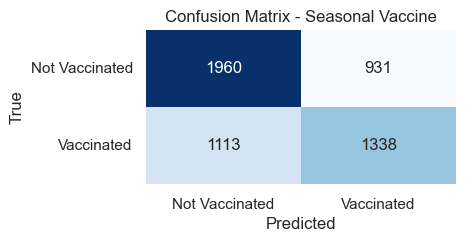

In [114]:
# Plot confusion matrix for seasonal vaccine
plt.figure(figsize=(4, 2))
sns.heatmap(knn_cm_seasonal, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Vaccinated', 'Vaccinated'],
            yticklabels=['Not Vaccinated', 'Vaccinated'])
plt.title('Confusion Matrix - Seasonal Vaccine')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Naive Bayes

In [115]:
# Create a Gaussian Naive Bayes model for H1N1 vaccine
nb_h1n1 = GaussianNB()

In [116]:
# Create a Gaussian Naive Bayes model for seasonal vaccine
nb_seasonal = GaussianNB()

In [117]:
# Fit the model for H1N1 vaccine
nb_h1n1.fit(X_train_h1n1, y_train_h1n1)

GaussianNB()

In [118]:
# Fit the model for seasonal vaccine
nb_seasonal.fit(X_train_seasonal, y_train_seasonal)

GaussianNB()

In [119]:
# Make predictions for H1N1 vaccine
nb_predictions_h1n1 = nb_h1n1.predict(X_test_h1n1)

In [120]:
# Make predictions for seasonal vaccine
nb_predictions_seasonal = nb_seasonal.predict(X_test_seasonal)

In [121]:
# Evaluate the model for H1N1 vaccine
print("H1N1 Vaccine Model Evaluation:")
print(confusion_matrix(y_test_h1n1, nb_predictions_h1n1))
print(classification_report(y_test_h1n1, nb_predictions_h1n1))
print(f"Accuracy: {accuracy_score(y_test_h1n1, nb_predictions_h1n1)}\n")

H1N1 Vaccine Model Evaluation:
[[3496  716]
 [ 481  649]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      4212
           1       0.48      0.57      0.52      1130

    accuracy                           0.78      5342
   macro avg       0.68      0.70      0.69      5342
weighted avg       0.79      0.78      0.78      5342

Accuracy: 0.775926619243729



In [122]:
# Create confusion matrix for H1N1 vaccine
nb_cm_h1n1 = confusion_matrix(y_test_h1n1, predictions_h1n1)


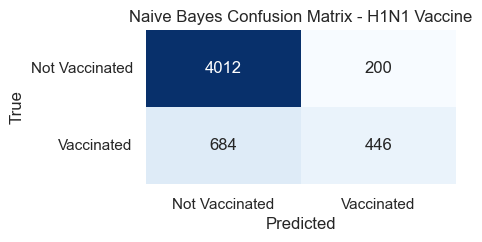

In [123]:
# Plot confusion matrix for H1N1 vaccine
plt.figure(figsize=(4, 2))
sns.heatmap(nb_cm_h1n1, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Vaccinated', 'Vaccinated'],
            yticklabels=['Not Vaccinated', 'Vaccinated'])
plt.title('Naive Bayes Confusion Matrix - H1N1 Vaccine')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [124]:
# Evaluate the model for seasonal vaccine
print("Seasonal Vaccine Model Evaluation:")
print(confusion_matrix(y_test_seasonal, predictions_seasonal))
print(classification_report(y_test_seasonal, predictions_seasonal))
print(f"Accuracy: {accuracy_score(y_test_seasonal, predictions_seasonal)}")

Seasonal Vaccine Model Evaluation:
[[2182  709]
 [1114 1337]]
              precision    recall  f1-score   support

           0       0.66      0.75      0.71      2891
           1       0.65      0.55      0.59      2451

    accuracy                           0.66      5342
   macro avg       0.66      0.65      0.65      5342
weighted avg       0.66      0.66      0.65      5342

Accuracy: 0.6587420441782104


In [125]:

# Create confusion matrix for seasonal vaccine
nb_cm_seasonal = confusion_matrix(y_test_seasonal, predictions_seasonal)

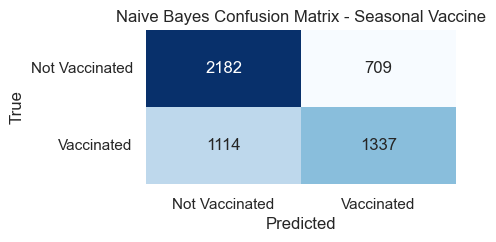

In [126]:
# Plot confusion matrix for seasonal vaccine
plt.figure(figsize=(4, 2))
sns.heatmap(nb_cm_seasonal, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Vaccinated', 'Vaccinated'],
            yticklabels=['Not Vaccinated', 'Vaccinated'])
plt.title('Naive Bayes Confusion Matrix - Seasonal Vaccine')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Ensemble Models

### Gradient Boosting

#### Gradient Boosting Machine (GBM) 

In [127]:
# Create a Gradient Boosting Classifier for H1N1 vaccine
gbm_h1n1 = GradientBoostingClassifier(random_state=42)

In [128]:
# Create a Gradient Boosting Classifier for H1N1 vaccine
gbm_seasonal = GradientBoostingClassifier(random_state=42)

In [129]:
# Hyperparameter tuning using GridSearchCV for H1N1 vaccine
param_grid_h1n1 = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [130]:
# Hyperparameter tuning using GridSearchCV for H1N1 vaccine
param_grid_seasonal = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [131]:
gbm_grid_search_h1n1 = GridSearchCV(gbm_h1n1, param_grid_h1n1, cv=5, scoring='accuracy')
gbm_grid_search_h1n1.fit(X_train_h1n1, y_train_h1n1)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy')

In [132]:
gbm_grid_search_seasonal = GridSearchCV(gbm_seasonal, param_grid_seasonal, cv=5, scoring='accuracy')
gbm_grid_search_seasonal.fit(X_train_seasonal, y_train_seasonal)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy')

In [133]:
# Get the best model from the grid search for H1N1 vaccine
best_gbm_h1n1 = gbm_grid_search_h1n1.best_estimator_

In [134]:
# Get the best model from the grid search for seasonal vaccine
best_gbm_seasonal = gbm_grid_search_seasonal.best_estimator_

In [135]:
# Make predictions for H1N1 vaccine
gbm_predictions_h1n1 = best_gbm_h1n1.predict(X_test_h1n1)

In [137]:
# Make predictions for seasonal vaccine
gbm_predictions_seasonal = best_gbm_seasonal.predict(X_test_seasonal)

In [138]:
# Evaluate the model for H1N1 vaccine
print("H1N1 Vaccine Model Evaluation:")
print(confusion_matrix(y_test_h1n1, gbm_predictions_h1n1))
print(classification_report(y_test_h1n1, gbm_predictions_h1n1))
print(f"Accuracy: {accuracy_score(y_test_h1n1, gbm_predictions_h1n1)}\n")

H1N1 Vaccine Model Evaluation:
[[3979  233]
 [ 641  489]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      4212
           1       0.68      0.43      0.53      1130

    accuracy                           0.84      5342
   macro avg       0.77      0.69      0.71      5342
weighted avg       0.82      0.84      0.82      5342

Accuracy: 0.8363908648446274



In [139]:
# Create confusion matrix for H1N1 vaccine
gbm_cm_h1n1 = confusion_matrix(y_test_h1n1, gbm_predictions_h1n1)

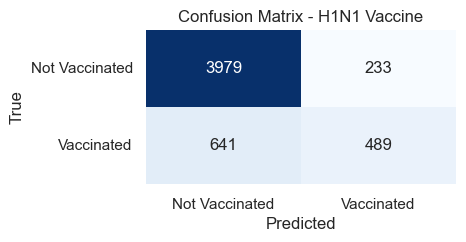

In [140]:
# Plot confusion matrix for H1N1 vaccine
plt.figure(figsize=(4, 2))
sns.heatmap(gbm_cm_h1n1, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Vaccinated', 'Vaccinated'],
            yticklabels=['Not Vaccinated', 'Vaccinated'])
plt.title('Confusion Matrix - H1N1 Vaccine')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [141]:
# Evaluate the model for seasonal vaccine
print("Seasonal Vaccine Model Evaluation:")
print(confusion_matrix(y_test_seasonal, predictions_seasonal))
print(classification_report(y_test_seasonal, predictions_seasonal))
print(f"Accuracy: {accuracy_score(y_test_seasonal, predictions_seasonal)}")

Seasonal Vaccine Model Evaluation:
[[2182  709]
 [1114 1337]]
              precision    recall  f1-score   support

           0       0.66      0.75      0.71      2891
           1       0.65      0.55      0.59      2451

    accuracy                           0.66      5342
   macro avg       0.66      0.65      0.65      5342
weighted avg       0.66      0.66      0.65      5342

Accuracy: 0.6587420441782104


In [142]:
# Create confusion matrix for seasonal vaccine
gbm_cm_seasonal = confusion_matrix(y_test_seasonal, gbm_predictions_seasonal)

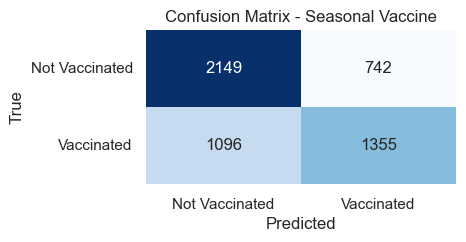

In [143]:
# Plot confusion matrix for seasonal vaccine
plt.figure(figsize=(4, 2))
sns.heatmap(gbm_cm_seasonal, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Vaccinated', 'Vaccinated'],
            yticklabels=['Not Vaccinated', 'Vaccinated'])
plt.title('Confusion Matrix - Seasonal Vaccine')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### XGBoost (Extreme Gradient Boosting)

In [144]:
# Create a Gradient Boosting Classifier for H1N1 vaccine
xgb_h1n1 = XGBClassifier(random_state=42)

In [145]:
# Create a Gradient Boosting Classifier for seasonal vaccine
xgb_seasonal = XGBClassifier(random_state=42)

In [146]:
# Hyperparameter tuning using GridSearchCV for H1N1 vaccine
param_grid_h1n1 = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 1, 5]
}

In [147]:
# Hyperparameter tuning using GridSearchCV for H1N1 vaccine
param_grid_seasonal = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 1, 5]
}

In [149]:
xgb_grid_search_h1n1 = GridSearchCV(xgb_h1n1, param_grid_h1n1, cv=5, scoring='accuracy')
xgb_grid_search_h1n1.fit(X_train_h1n1, y_train_h1n1)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'gamma': [0, 1, 5], 'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 150, 200],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy')

In [150]:
xgb_grid_search_seasonal = GridSearchCV(xgb_seasonal, param_grid_seasonal, cv=5, scoring='accuracy')
xgb_grid_search_seasonal.fit(X_train_seasonal, y_train_seasonal)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'gamma': [0, 1, 5], 'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 150, 200],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy')

In [151]:
# Get the best model from the grid search for H1N1 vaccine
best_xgb_h1n1 = xgb_grid_search_h1n1.best_estimator_


In [152]:
# Get the best model from the grid search for seasonal vaccine
best_xgb_seasonal = xgb_grid_search_seasonal.best_estimator_


In [153]:
# Make predictions for H1N1 vaccine
xgb_predictions_h1n1 = best_xgb_h1n1.predict(X_test_h1n1)


In [154]:
# Make predictions for seasonal vaccine
xgb_predictions_seasonal = best_xgb_seasonal.predict(X_test_seasonal)


In [155]:
# Evaluate the model for H1N1 vaccine
print("H1N1 Vaccine Model Evaluation:")
print(confusion_matrix(y_test_h1n1, xgb_predictions_h1n1))
print(classification_report(y_test_h1n1, xgb_predictions_h1n1))
print(f"Accuracy: {accuracy_score(y_test_h1n1, xgb_predictions_h1n1)}\n")

H1N1 Vaccine Model Evaluation:
[[3982  230]
 [ 647  483]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4212
           1       0.68      0.43      0.52      1130

    accuracy                           0.84      5342
   macro avg       0.77      0.69      0.71      5342
weighted avg       0.82      0.84      0.82      5342

Accuracy: 0.8358292774241857



In [156]:
# Create confusion matrix for H1N1 vaccine
xgb_cm_h1n1 = confusion_matrix(y_test_h1n1, xgb_predictions_h1n1)

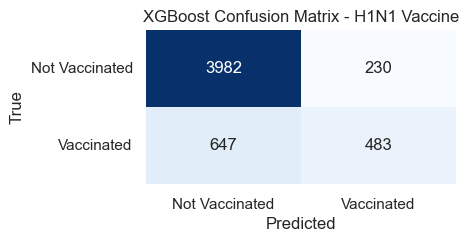

In [157]:
# Plot confusion matrix for H1N1 vaccine
plt.figure(figsize=(4, 2))
sns.heatmap(xgb_cm_h1n1, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Vaccinated', 'Vaccinated'],
            yticklabels=['Not Vaccinated', 'Vaccinated'])
plt.title('XGBoost Confusion Matrix - H1N1 Vaccine')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [158]:
# Evaluate the model for seasonal vaccine
print("Seasonal Vaccine Model Evaluation:")
print(confusion_matrix(y_test_seasonal, predictions_seasonal))
print(classification_report(y_test_seasonal, predictions_seasonal))
print(f"Accuracy: {accuracy_score(y_test_seasonal, predictions_seasonal)}")

Seasonal Vaccine Model Evaluation:
[[2182  709]
 [1114 1337]]
              precision    recall  f1-score   support

           0       0.66      0.75      0.71      2891
           1       0.65      0.55      0.59      2451

    accuracy                           0.66      5342
   macro avg       0.66      0.65      0.65      5342
weighted avg       0.66      0.66      0.65      5342

Accuracy: 0.6587420441782104


In [159]:
# Create confusion matrix for seasonal vaccine
xgb_cm_seasonal = confusion_matrix(y_test_seasonal, predictions_seasonal)

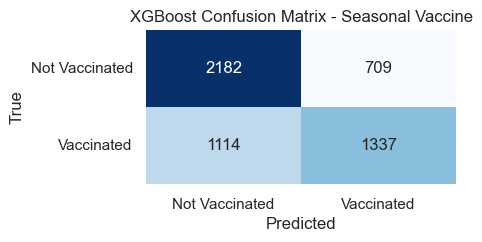

In [160]:
# Plot confusion matrix for seasonal vaccine
plt.figure(figsize=(4, 2))
sns.heatmap(xgb_cm_seasonal, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Vaccinated', 'Vaccinated'],
            yticklabels=['Not Vaccinated', 'Vaccinated'])
plt.title('XGBoost Confusion Matrix - Seasonal Vaccine')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### Light GBM

In [161]:
# Create a LightGBM classifier for H1N1 vaccine
lgbm_h1n1 = LGBMClassifier(random_state=42)
# Create a LightGBM classifier for seasonal vaccine
lgbm_seasonal = LGBMClassifier(random_state=42)

In [162]:
# Fit the model to your training data for H1N1 vaccine
lgbm_h1n1.fit(X_train_h1n1, y_train_h1n1)


[LightGBM] [Info] Number of positive: 4544, number of negative: 16821
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001098 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 54
[LightGBM] [Info] Number of data points in the train set: 21365, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.212684 -> initscore=-1.308820
[LightGBM] [Info] Start training from score -1.308820


LGBMClassifier(random_state=42)

In [163]:
# Fit the model to your training data for seasonal vaccine
lgbm_seasonal.fit(X_train_seasonal, y_train_seasonal)

[LightGBM] [Info] Number of positive: 9984, number of negative: 11381
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000744 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 54
[LightGBM] [Info] Number of data points in the train set: 21365, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.467306 -> initscore=-0.130961
[LightGBM] [Info] Start training from score -0.130961


LGBMClassifier(random_state=42)

In [164]:
# Make predictions for H1N1 vaccine
lgbm_predictions_h1n1 = lgbm_h1n1.predict(X_test_h1n1)


In [165]:
# Make predictions for seasonal vaccine
lgbm_predictions_seasonal = lgbm_seasonal.predict(X_test_seasonal)

In [166]:
# Evaluate the model for H1N1 vaccine
print("H1N1 Vaccine Model Evaluation:")
print(confusion_matrix(y_test_h1n1, lgbm_predictions_h1n1))
print(classification_report(y_test_h1n1, lgbm_predictions_h1n1))
print(f"Accuracy: {accuracy_score(y_test_h1n1, lgbm_predictions_h1n1)}\n")

H1N1 Vaccine Model Evaluation:
[[3971  241]
 [ 628  502]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      4212
           1       0.68      0.44      0.54      1130

    accuracy                           0.84      5342
   macro avg       0.77      0.69      0.72      5342
weighted avg       0.82      0.84      0.82      5342

Accuracy: 0.8373268438786972



In [167]:
# Create confusion matrix for H1N1 vaccine
lgbm_cm_h1n1 = confusion_matrix(y_test_h1n1, lgbm_predictions_h1n1)

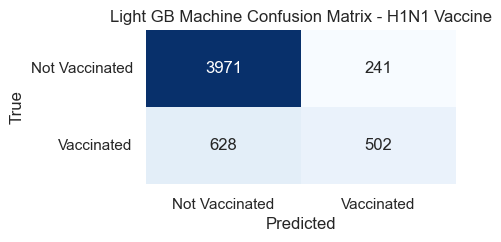

In [168]:
# Plot confusion matrix for H1N1 vaccine
plt.figure(figsize=(4, 2))
sns.heatmap(lgbm_cm_h1n1, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Vaccinated', 'Vaccinated'],
            yticklabels=['Not Vaccinated', 'Vaccinated'])
plt.title('Light GB Machine Confusion Matrix - H1N1 Vaccine')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [169]:
# Evaluate the model for seasonal vaccine
print("Seasonal Vaccine Model Evaluation:")
print(confusion_matrix(y_test_seasonal, lgbm_predictions_seasonal))
print(classification_report(y_test_seasonal, lgbm_predictions_seasonal))
print(f"Accuracy: {accuracy_score(y_test_seasonal, lgbm_predictions_seasonal)}")

Seasonal Vaccine Model Evaluation:
[[2088  803]
 [1027 1424]]
              precision    recall  f1-score   support

           0       0.67      0.72      0.70      2891
           1       0.64      0.58      0.61      2451

    accuracy                           0.66      5342
   macro avg       0.65      0.65      0.65      5342
weighted avg       0.66      0.66      0.66      5342

Accuracy: 0.6574316735305129


In [170]:
# Create confusion matrix for H1N1 vaccine
lgbm_cm_seasonal = confusion_matrix(y_test_seasonal, lgbm_predictions_seasonal)

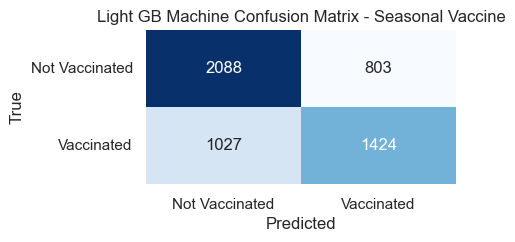

In [171]:
# Plot confusion matrix for seasonal vaccine
plt.figure(figsize=(4, 2))
sns.heatmap(lgbm_cm_seasonal, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Vaccinated', 'Vaccinated'],
            yticklabels=['Not Vaccinated', 'Vaccinated'])
plt.title('Light GB Machine Confusion Matrix - Seasonal Vaccine')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### Ada Boost

In [172]:
# Create an AdaBoost classifier for H1N1 vaccine
adaboost_h1n1 = AdaBoostClassifier(random_state=42)

# Create an AdaBoost classifier for seasonal vaccine
adaboost_seasonal = AdaBoostClassifier(random_state=42)

In [173]:
# Fit the model to your training data for H1N1 vaccine
adaboost_h1n1.fit(X_train_h1n1, y_train_h1n1)


AdaBoostClassifier(random_state=42)

In [174]:

# Fit the model to your training data for seasonal vaccine
adaboost_seasonal.fit(X_train_seasonal, y_train_seasonal)

AdaBoostClassifier(random_state=42)

In [175]:
# Make predictions for H1N1 vaccine
adaboost_predictions_h1n1 = adaboost_h1n1.predict(X_test_h1n1)

# Make predictions for seasonal vaccine
adaboost_predictions_seasonal = adaboost_seasonal.predict(X_test_seasonal)

In [179]:
# Evaluate the model for H1N1 vaccine
print("H1N1 Vaccine Model Evaluation:")
print(confusion_matrix(y_test_h1n1, adaboost_predictions_h1n1))
print(classification_report(y_test_h1n1, adaboost_predictions_h1n1))
print(f"Accuracy: {accuracy_score(y_test_h1n1, adaboost_predictions_h1n1)}\n")

H1N1 Vaccine Model Evaluation:
[[4025  187]
 [ 684  446]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      4212
           1       0.70      0.39      0.51      1130

    accuracy                           0.84      5342
   macro avg       0.78      0.68      0.70      5342
weighted avg       0.82      0.84      0.82      5342

Accuracy: 0.8369524522650693



In [180]:
# Create confusion matrix for H1N1 vaccine
adaboost_cm_h1n1 = confusion_matrix(y_test_h1n1, adaboost_predictions_h1n1)

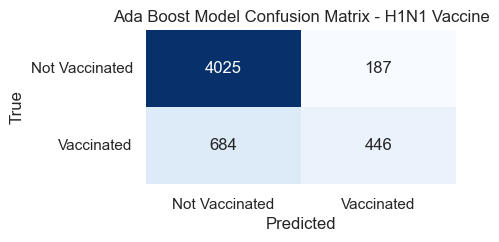

In [181]:
# Plot confusion matrix for H1N1 vaccine
plt.figure(figsize=(4, 2))
sns.heatmap(adaboost_cm_h1n1, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Vaccinated', 'Vaccinated'],
            yticklabels=['Not Vaccinated', 'Vaccinated'])
plt.title('Ada Boost Model Confusion Matrix - H1N1 Vaccine')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [182]:
# Evaluate the model for seasonal vaccine
print("Seasonal Vaccine Model Evaluation:")
print(confusion_matrix(y_test_seasonal, adaboost_predictions_seasonal))
print(classification_report(y_test_seasonal, adaboost_predictions_seasonal))
print(f"Accuracy: {accuracy_score(y_test_seasonal, adaboost_predictions_seasonal)}")

Seasonal Vaccine Model Evaluation:
[[2144  747]
 [1072 1379]]
              precision    recall  f1-score   support

           0       0.67      0.74      0.70      2891
           1       0.65      0.56      0.60      2451

    accuracy                           0.66      5342
   macro avg       0.66      0.65      0.65      5342
weighted avg       0.66      0.66      0.66      5342

Accuracy: 0.6594908274054662


In [183]:
# Create confusion matrix for seasonal vaccine
adaboost_cm_seasonal = confusion_matrix(y_test_seasonal, adaboost_predictions_seasonal)

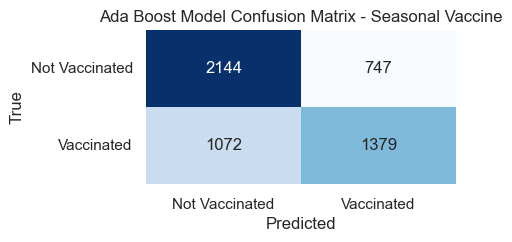

In [184]:
# Plot confusion matrix for seasonal vaccine
plt.figure(figsize=(4, 2))
sns.heatmap(adaboost_cm_seasonal, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Vaccinated', 'Vaccinated'],
            yticklabels=['Not Vaccinated', 'Vaccinated'])
plt.title('Ada Boost Model Confusion Matrix - Seasonal Vaccine')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Neural Network

#### Multi-layer Perception

In [185]:
# Create an MLP classifier for H1N1 vaccine
mlp_h1n1 = MLPClassifier(random_state=42, max_iter=5000, early_stopping=True,)

# Create an MLP classifier for seasonal vaccine
mlp_seasonal = MLPClassifier(random_state=42, max_iter=5000, early_stopping=True,)

In [186]:
# Fit the model to your training data for H1N1 vaccine
mlp_h1n1.fit(X_train_h1n1, y_train_h1n1)


MLPClassifier(early_stopping=True, max_iter=5000, random_state=42)

In [187]:
# Fit the model to your training data for seasonal vaccine
mlp_seasonal.fit(X_train_seasonal, y_train_seasonal)

MLPClassifier(early_stopping=True, max_iter=5000, random_state=42)

In [188]:
# Make predictions for H1N1 vaccine
mlp_predictions_h1n1 = mlp_h1n1.predict(X_test_h1n1)

# Make predictions for seasonal vaccine
mlp_predictions_seasonal = mlp_seasonal.predict(X_test_seasonal)

In [189]:
# Evaluate the model for H1N1 vaccine
print("H1N1 Vaccine Model Evaluation:")
print(confusion_matrix(y_test_h1n1, mlp_predictions_h1n1))
print(classification_report(y_test_h1n1, mlp_predictions_h1n1))
print(f"Accuracy: {accuracy_score(y_test_h1n1, mlp_predictions_h1n1)}\n")

H1N1 Vaccine Model Evaluation:
[[3993  219]
 [ 651  479]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4212
           1       0.69      0.42      0.52      1130

    accuracy                           0.84      5342
   macro avg       0.77      0.69      0.71      5342
weighted avg       0.82      0.84      0.82      5342

Accuracy: 0.8371396480718832



In [190]:
# Create confusion matrix for H1N1 vaccine
mlp_cm_h1n1 = confusion_matrix(y_test_h1n1, mlp_predictions_h1n1)

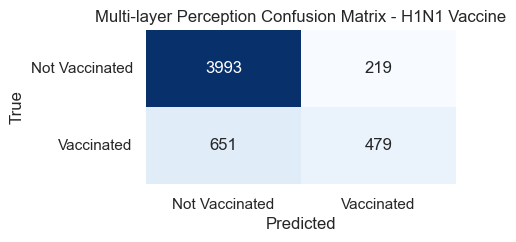

In [191]:
# Plot confusion matrix for H1N1 vaccine
plt.figure(figsize=(4, 2))
sns.heatmap(mlp_cm_h1n1, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Vaccinated', 'Vaccinated'],
            yticklabels=['Not Vaccinated', 'Vaccinated'])
plt.title('Multi-layer Perception Confusion Matrix - H1N1 Vaccine')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [192]:
# Evaluate the model for seasonal vaccine
print("Seasonal Vaccine Model Evaluation:")
print(confusion_matrix(y_test_seasonal, mlp_predictions_seasonal))
print(classification_report(y_test_seasonal, mlp_predictions_seasonal))
print(f"Accuracy: {accuracy_score(y_test_seasonal, mlp_predictions_seasonal)}")

Seasonal Vaccine Model Evaluation:
[[2066  825]
 [ 999 1452]]
              precision    recall  f1-score   support

           0       0.67      0.71      0.69      2891
           1       0.64      0.59      0.61      2451

    accuracy                           0.66      5342
   macro avg       0.66      0.65      0.65      5342
weighted avg       0.66      0.66      0.66      5342

Accuracy: 0.6585548483713964


In [193]:
# Create confusion matrix for seasonal vaccine
mlp_cm_seasonal = confusion_matrix(y_test_seasonal, mlp_predictions_seasonal)

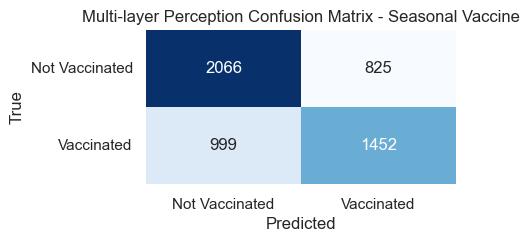

In [194]:
# Plot confusion matrix for seasonal vaccine
plt.figure(figsize=(4, 2))
sns.heatmap(mlp_cm_seasonal, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Vaccinated', 'Vaccinated'],
            yticklabels=['Not Vaccinated', 'Vaccinated'])
plt.title('Multi-layer Perception Confusion Matrix - Seasonal Vaccine')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### Convolutional Neural Network (CNN)

In [195]:
# Reshape the data into 2D grid (number of features, 1)
cnn_X_train_h1n1 = X_train_h1n1.reshape(X_train_h1n1.shape[0], X_train_h1n1.shape[1], 1)
cnn_X_test_h1n1 = X_test_h1n1.reshape(X_test_h1n1.shape[0], X_test_h1n1.shape[1], 1)

cnn_X_train_seasonal = X_train_seasonal.reshape(X_train_seasonal.shape[0], X_train_seasonal.shape[1], 1)
cnn_X_test_seasonal = X_test_seasonal.reshape(X_test_seasonal.shape[0], X_test_seasonal.shape[1], 1)


In [202]:
# Build a simple CNN model for H1N1 vaccine
cnn_model_h1n1 = Sequential([
    Reshape((cnn_X_train_h1n1.shape[1], 1), input_shape=(cnn_X_train_h1n1.shape[1],)),
    Dense(64, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [203]:
# Build a simple CNN model for seasonal vaccine
cnn_model_seasonal = Sequential([
    Reshape((cnn_X_train_seasonal.shape[1], 1), input_shape=(cnn_X_train_seasonal.shape[1],)),
    Dense(64, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [204]:
# Compile the model
cnn_model_h1n1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [205]:
# Compile the model
cnn_model_seasonal.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [207]:
# Fit the model to your training data for H1N1 vaccine
cnn_model_h1n1.fit(cnn_X_train_h1n1, y_train_h1n1, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10


601/601 [==============================] - 1s 1ms/step - loss: 0.4162 - accuracy: 0.8213 - val_loss: 0.3904 - val_accuracy: 0.8376
Epoch 2/10
601/601 [==============================] - 1s 902us/step - loss: 0.4002 - accuracy: 0.8291 - val_loss: 0.3881 - val_accuracy: 0.8381
Epoch 3/10
601/601 [==============================] - 1s 901us/step - loss: 0.3996 - accuracy: 0.8282 - val_loss: 0.3905 - val_accuracy: 0.8372
Epoch 4/10
601/601 [==============================] - 1s 840us/step - loss: 0.4000 - accuracy: 0.8287 - val_loss: 0.3893 - val_accuracy: 0.8348
Epoch 5/10
601/601 [==============================] - 1s 856us/step - loss: 0.3996 - accuracy: 0.8279 - val_loss: 0.3890 - val_accuracy: 0.8381
Epoch 6/10
601/601 [==============================] - 1s 835us/step - loss: 0.3995 - accuracy: 0.8286 - val_loss: 0.3980 - val_accuracy: 0.8306
Epoch 7/10
601/601 [==============================] - 0s 828us/step - loss: 0.4000 - accuracy: 0.8294 - val_loss: 0.3898 - val_accuracy:

In [208]:
# Fit the model to your training data for seasonal vaccine
cnn_model_seasonal.fit(cnn_X_train_seasonal, y_train_seasonal, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
601/601 [==============================] - 1s 989us/step - loss: 0.6342 - accuracy: 0.6399 - val_loss: 0.6249 - val_accuracy: 0.6584
Epoch 2/10
601/601 [==============================] - 0s 799us/step - loss: 0.6288 - accuracy: 0.6491 - val_loss: 0.6309 - val_accuracy: 0.6500
Epoch 3/10
601/601 [==============================] - 1s 838us/step - loss: 0.6281 - accuracy: 0.6508 - val_loss: 0.6228 - val_accuracy: 0.6607
Epoch 4/10
601/601 [==============================] - 1s 847us/step - loss: 0.6279 - accuracy: 0.6498 - val_loss: 0.6237 - val_accuracy: 0.6589
Epoch 5/10
601/601 [==============================] - 1s 904us/step - loss: 0.6278 - accuracy: 0.6490 - val_loss: 0.6236 - val_accuracy: 0.6626
Epoch 6/10
601/601 [==============================] - 1s 842us/step - loss: 0.6275 - accuracy: 0.6500 - val_loss: 0.6223 - val_accuracy: 0.6626
Epoch 7/10
601/601 [==============================] - 0s 828us/step - loss: 0.6273 - accuracy: 0.6520 - val_loss: 0.6237 - val_accuracy:

In [209]:
# Make predictions for H1N1 vaccine
cnn_predictions_h1n1 = (cnn_model_h1n1.predict(cnn_X_test_h1n1) > 0.5).astype(int)

167/167 [==============================] - 0s 742us/step


In [210]:
# Make predictions for seasonal vaccine
cnn_predictions_seasonal = (cnn_model_seasonal.predict(cnn_X_test_seasonal) > 0.5).astype(int)

167/167 [==============================] - 0s 737us/step


In [211]:
# Evaluate the model for H1N1 vaccine
cnn_accuracy_h1n1 = accuracy_score(y_test_h1n1, cnn_predictions_h1n1)
print(f"H1N1 Vaccine Accuracy: {cnn_accuracy_h1n1}")

H1N1 Vaccine Accuracy: 0.8371396480718832


In [215]:
# Create a confusion matrix for H1N1 vaccine
cnn_cm_h1n1 = confusion_matrix(y_test_h1n1, cnn_predictions_h1n1)

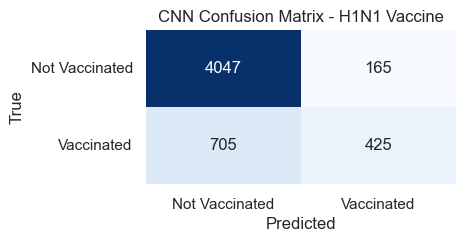

In [216]:
# Plot confusion matrix for H1N1 vaccine
plt.figure(figsize=(4, 2))
sns.heatmap(cnn_cm_h1n1, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Vaccinated', 'Vaccinated'],
            yticklabels=['Not Vaccinated', 'Vaccinated'])
plt.title('CNN Confusion Matrix - H1N1 Vaccine')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [214]:
# Evaluate the model for seasonal vaccine
cnn_accuracy_seasonal = accuracy_score(y_test_seasonal, cnn_predictions_seasonal)
print(f"Seasonal Vaccine Accuracy: {cnn_accuracy_seasonal}")

Seasonal Vaccine Accuracy: 0.6531261699737926


In [217]:
# Create a confusion matrix for seasonal vaccine
cnn_cm_seasonal = confusion_matrix(y_test_seasonal, cnn_predictions_seasonal)

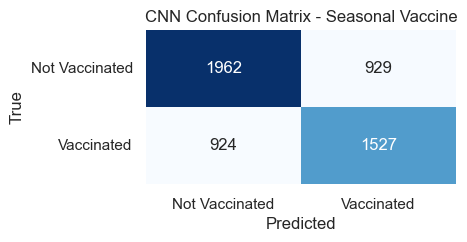

In [218]:
# Plot confusion matrix for seasonal vaccine
plt.figure(figsize=(4, 2))
sns.heatmap(cnn_cm_seasonal, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Vaccinated', 'Vaccinated'],
            yticklabels=['Not Vaccinated', 'Vaccinated'])
plt.title('CNN Confusion Matrix - Seasonal Vaccine')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### Recurrent Neural Network (RNN)

In [219]:
# Reshape the data into 3D tensor (number of samples, number of timesteps, number of features)
rnn_X_train_h1n1 = X_train_h1n1.reshape(X_train_h1n1.shape[0], 1, X_train_h1n1.shape[1])
rnn_X_test_h1n1 = X_test_h1n1.reshape(X_test_h1n1.shape[0], 1, X_test_h1n1.shape[1])


# # Build a simple RNN model for H1N1 vaccine
# model_h1n1 = Sequential([
#     SimpleRNN(32, input_shape=(X_train_h1n1.shape[1], X_train_h1n1.shape[2])),
#     Dense(1, activation='sigmoid')
# ])



In [220]:
rnn_X_train_seasonal = X_train_seasonal.reshape(X_train_seasonal.shape[0], 1, X_train_seasonal.shape[1])
rnn_X_test_seasonal = X_test_seasonal.reshape(X_test_seasonal.shape[0], 1, X_test_seasonal.shape[1])


# # Build a simple RNN model for seasonal vaccine
# model_seasonal = Sequential([
#     SimpleRNN(32, input_shape=(X_train_seasonal.shape[1], X_train_seasonal.shape[2])),
#     Dense(1, activation='sigmoid')
# ])

In [225]:
# Build a simple LSTM model for H1N1 vaccine
rnn_model_h1n1 = Sequential([
    LSTM(64, activation='relu', input_shape=(rnn_X_train_h1n1.shape[1], rnn_X_train_h1n1.shape[2])),
    Dense(1, activation='sigmoid')
])

In [226]:
# Build a simple LSTM model for seasonal vaccine
rnn_model_seasonal = Sequential([
    LSTM(64, activation='relu', input_shape=(rnn_X_train_seasonal.shape[1], rnn_X_train_seasonal.shape[2])),
    Dense(1, activation='sigmoid')
])

In [227]:
# Compile the model
rnn_model_h1n1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [228]:
# Compile the model
rnn_model_seasonal.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [230]:
# Fit the model to your training data for H1N1 vaccine
rnn_model_h1n1.fit(rnn_X_train_h1n1, y_train_h1n1, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
601/601 [==============================] - 2s 1ms/step - loss: 0.4384 - accuracy: 0.8176 - val_loss: 0.3915 - val_accuracy: 0.8390
Epoch 2/10
601/601 [==============================] - 1s 1ms/step - loss: 0.3962 - accuracy: 0.8299 - val_loss: 0.3855 - val_accuracy: 0.8423
Epoch 3/10
601/601 [==============================] - 1s 997us/step - loss: 0.3931 - accuracy: 0.8312 - val_loss: 0.3855 - val_accuracy: 0.8418
Epoch 4/10
601/601 [==============================] - 1s 981us/step - loss: 0.3913 - accuracy: 0.8310 - val_loss: 0.3852 - val_accuracy: 0.8442
Epoch 5/10
601/601 [==============================] - 1s 1ms/step - loss: 0.3905 - accuracy: 0.8316 - val_loss: 0.3835 - val_accuracy: 0.8446
Epoch 6/10
601/601 [==============================] - 1s 1ms/step - loss: 0.3896 - accuracy: 0.8319 - val_loss: 0.3830 - val_accuracy: 0.8446
Epoch 7/10
601/601 [==============================] - 1s 1ms/step - loss: 0.3886 - accuracy: 0.8331 - val_loss: 0.3842 - val_accuracy: 0.8404
Ep

In [231]:
# Fit the model to your training data for seasonal vaccine
rnn_model_seasonal.fit(rnn_X_train_seasonal, y_train_seasonal, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
601/601 [==============================] - 2s 1ms/step - loss: 0.6346 - accuracy: 0.6442 - val_loss: 0.6202 - val_accuracy: 0.6645
Epoch 2/10
601/601 [==============================] - 1s 997us/step - loss: 0.6240 - accuracy: 0.6523 - val_loss: 0.6188 - val_accuracy: 0.6598
Epoch 3/10
601/601 [==============================] - 1s 1ms/step - loss: 0.6224 - accuracy: 0.6539 - val_loss: 0.6184 - val_accuracy: 0.6640
Epoch 4/10
601/601 [==============================] - 1s 1ms/step - loss: 0.6212 - accuracy: 0.6576 - val_loss: 0.6176 - val_accuracy: 0.6612
Epoch 5/10
601/601 [==============================] - 1s 1ms/step - loss: 0.6204 - accuracy: 0.6573 - val_loss: 0.6187 - val_accuracy: 0.6664
Epoch 6/10
601/601 [==============================] - 1s 1ms/step - loss: 0.6197 - accuracy: 0.6585 - val_loss: 0.6160 - val_accuracy: 0.6617
Epoch 7/10
601/601 [==============================] - 1s 1ms/step - loss: 0.6186 - accuracy: 0.6602 - val_loss: 0.6171 - val_accuracy: 0.6593
Epoc

In [232]:
# Make predictions for H1N1 vaccine
rnn_predictions_h1n1 = (rnn_model_h1n1.predict(rnn_X_test_h1n1) > 0.5).astype(int)

167/167 [==============================] - 0s 800us/step


In [233]:
# Make predictions for seasonal vaccine
rnn_predictions_seasonal = (rnn_model_seasonal.predict(rnn_X_test_seasonal) > 0.5).astype(int)

167/167 [==============================] - 0s 761us/step


In [234]:
# Evaluate the model for H1N1 vaccine
rnn_accuracy_h1n1 = accuracy_score(y_test_h1n1, rnn_predictions_h1n1)
print(f"H1N1 Vaccine Accuracy: {rnn_accuracy_h1n1}")

H1N1 Vaccine Accuracy: 0.8388244103332085


In [235]:
# Create a confusion matrix for H1N1 vaccine
rnn_cm_h1n1 = confusion_matrix(y_test_h1n1, rnn_predictions_h1n1)

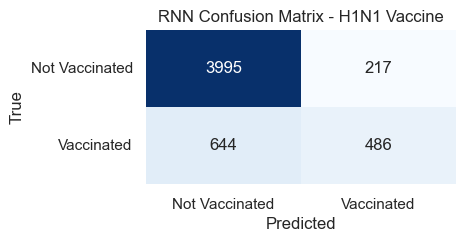

In [236]:
# Plot confusion matrix for H1N1 vaccine
plt.figure(figsize=(4, 2))
sns.heatmap(rnn_cm_h1n1, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Vaccinated', 'Vaccinated'],
            yticklabels=['Not Vaccinated', 'Vaccinated'])
plt.title('RNN Confusion Matrix - H1N1 Vaccine')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [237]:
# Evaluate the model for seasonal vaccine
rnn_accuracy_seasonal = accuracy_score(y_test_seasonal, rnn_predictions_seasonal)
print(f"Seasonal Vaccine Accuracy: {rnn_accuracy_seasonal}")

Seasonal Vaccine Accuracy: 0.6613627854736054


In [238]:
# Create a confusion matrix for seasonal vaccine
rnn_cm_seasonal = confusion_matrix(y_test_seasonal, rnn_predictions_seasonal)

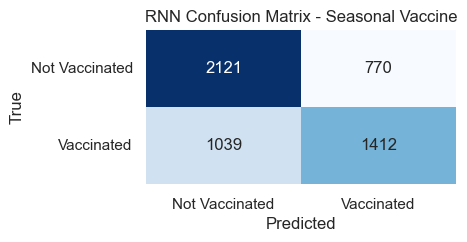

In [240]:
# Plot confusion matrix for seasonal vaccine
plt.figure(figsize=(4, 2))
sns.heatmap(rnn_cm_seasonal, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Vaccinated', 'Vaccinated'],
            yticklabels=['Not Vaccinated', 'Vaccinated'])
plt.title('RNN Confusion Matrix - Seasonal Vaccine')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Best Performing Model

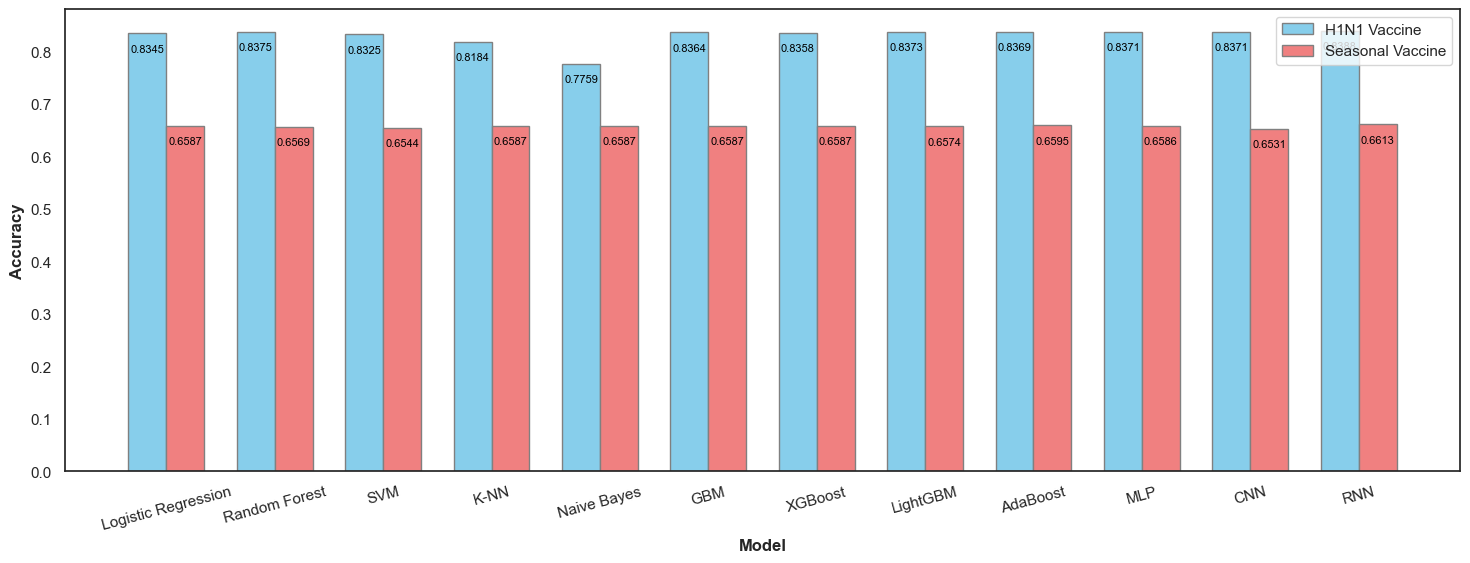

In [269]:
# Model names
models = ['Logistic Regression', 'Random Forest', 'SVM', 'K-NN', 'Naive Bayes', 'GBM', 'XGBoost', 'LightGBM', 'AdaBoost', 'MLP', 'CNN', 'RNN']

# Corresponding accuracy scores 
accuracy_h1n1 = [0.8345, 0.8375, 0.8325, 0.8184, 0.7759, 0.8364, 0.8358, 0.8373, 0.8369, 0.8371, 0.8371, 0.8388]
accuracy_seasonal = [0.6587, 0.6569, 0.6544, 0.6587, 0.6587, 0.6587, 0.6587, 0.6574, 0.6595, 0.6586, 0.6531, 0.6613]

bar_width = 0.35 

# Set positions for the bars
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]

# Plotting
plt.figure(figsize=(18, 6))

# Bar chart for both vaccines
bars1 = plt.bar(r1, accuracy_h1n1, color='skyblue', width=bar_width, edgecolor='grey', label='H1N1 Vaccine')
bars2 = plt.bar(r2, accuracy_seasonal, color='lightcoral', width=bar_width, edgecolor='grey', label='Seasonal Vaccine')

# Add labels
plt.xlabel('Model', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(models))], models, rotation=15)
plt.ylabel('Accuracy', fontweight='bold')

# Add data labels
for bar, label in zip(bars1, accuracy_h1n1):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.02, f'{label:.4f}', ha='center', va='top', color='black', fontsize=8)

for bar, label in zip(bars2, accuracy_seasonal):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.02, f'{label:.4f}', ha='center', va='top', color='black', fontsize=8)

plt.legend()
plt.show()